## 4INTELLIGENCE - PROCESSO SELETIVO - <b>RODRIGO TOLEDO</b> - DS 2021

In [1]:
import pandas as pd
import numpy as np

# Libs para visualizações
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')


from pmdarima.arima import auto_arima

import tensorflow as tf
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error


import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults,ARMA,ARMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
#import os


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Arquivo BASE fornecido pela empresa:

df_base = pd.read_excel("c:/Users/rodri/Downloads/Bases_Final_ADS_Jun2021.xlsx", sheet_name="dados",parse_dates=True, index_col=0)
df_base

,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,...,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
data_tidy,,,,,,,,,,,,,,,,,,,,,
2004-01-01,307.28207,193.80956,589.29026,704.00174,2450.45329,364.326990,840.29035,2015.78331,1810.98019,6977.47082,...,49.488000,28.320430,19.165591,54.848000,78.497000,50.755550,27.618279,20.365591,47.369000,75.454326
2004-02-01,290.14685,175.49530,550.77261,733.89486,2396.96520,372.651510,810.25628,1942.01969,1931.86643,7084.62266,...,46.932000,28.213793,18.634483,51.696000,80.047000,48.108250,28.047126,20.089655,45.738000,72.953183
2004-03-01,307.10015,182.75690,573.02799,738.45706,2402.52074,408.630620,880.88796,2082.25048,2149.03063,7087.61326,...,54.556000,27.595699,17.848387,57.356000,95.784000,54.134850,28.181720,19.749463,49.252000,83.942665
2004-04-01,329.16091,189.49076,603.93873,743.57047,2580.91388,419.430051,861.61210,2056.94675,2164.76220,7384.53963,...,53.024000,26.797778,17.729310,58.216000,92.275000,52.015075,27.537778,19.650000,49.755000,79.495481
2004-05-01,303.23791,191.64219,570.17652,696.57947,2344.08400,407.523810,901.70980,2100.19137,2164.98022,7258.30672,...,54.860000,20.615054,12.606452,60.436000,92.550000,54.345225,25.391398,17.573118,51.849000,84.187962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.176173,21.597475,12.252589,103.731918,115.268656,96.789982,25.196586,16.738953,95.378248,97.696270
2022-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.060814,23.282610,14.711634,101.394121,106.287606,92.418382,27.313327,18.593525,92.157114,93.302467
2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.176969,24.570273,16.166273,106.736889,111.985699,96.191629,27.952405,19.932793,96.270101,95.319248


In [3]:
df_base.isna().count().count()
df_base.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 228 entries, 2004-01-01 to 2022-12-01
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   com_co       206 non-null    float64
 1   com_n        206 non-null    float64
 2   com_ne       206 non-null    float64
 3   com_s        206 non-null    float64
 4   com_se       206 non-null    float64
 5   ind_co       206 non-null    float64
 6   ind_n        206 non-null    float64
 7   ind_ne       206 non-null    float64
 8   ind_s        206 non-null    float64
 9   ind_se       206 non-null    float64
 10  res_co       206 non-null    float64
 11  res_n        206 non-null    float64
 12  res_ne       206 non-null    float64
 13  res_s        206 non-null    float64
 14  res_se       206 non-null    float64
 15  renda_r      130 non-null    float64
 16  pop_ocup_br  228 non-null    float64
 17  massa_r      130 non-null    float64
 18  du           228 non-null    in

In [4]:
# data de 2004 a 20020
#df_2 = df[(df.index.year >= 2004) & (df.index.year <= 2020)]
#df_2.index.year.value_counts().sort_index()

In [5]:
# Função para criar DataFrame por Região, acrescentado algumas métricas - Usando Apenas anos de 2004 a 2020 
# para análises descritivas

# Região Norte = n
# Região Sul = s
# Região Sudeste = se
# Região Nordeste = ne
# Região Centro-Oeste = co


def criar_df_regiao(df,region):
    df_reduced = (df_base[(df_base.index.year >= 2004) & (df_base.index.year <= 2020)])
    df = pd.DataFrame(index=df_reduced.index)
    df['Ano'] = df_reduced.index.year
    df['Mês'] = df_reduced.index.month
    df['Estação_Ano'] = (df_reduced.index.month%12 + 3)//3
    df['Estação_Ano'] = df['Estação_Ano'].replace({1:'Verão',
                                                   2:'Outono',
                                                   3:'Inverno',
                                                   4:'Primavera'})

    df['Consumo_Ind'] = df_reduced[f'ind_{region}'].values
    df['Consumo_Res'] = df_reduced[f'res_{region}'].values
    df['Consumo_Com'] = df_reduced[f'com_{region}'].values
    df['Pesq_Mensal_Com_A'] = df_reduced[f'pmc_a_{region}'].values
    df['Pesq_Mensal_Com_R'] = df_reduced[f'pmc_r_{region}'].values
    df['População'] = df_reduced['pop_ocup_br']
    df['Temp_Maxima'] = df_reduced[f'temp_max_{region}'].values
    df['Temp_Minima'] = df_reduced[f'temp_min_{region}'].values
    df['Produção_Industrial'] = df_reduced[f'pim_{region}'].values
    df['Variação_Temp'] = df['Temp_Maxima'] - df['Temp_Minima']
    return df
    

In [6]:
# Criando DF's para as 5 regiões, período de 2004 a 2020!

df_sudeste = criar_df_regiao(df_base,'se')
df_sul = criar_df_regiao(df_base,'s')
df_norte = criar_df_regiao(df_base,'n')
df_centro_oeste = criar_df_regiao(df_base,'co')
df_nordeste = criar_df_regiao(df_base,'ne')

##                                    Análise Setor Industrial

In [7]:
# # VErificando existência de indices duplicados
# duplicate_index = df_sudeste[df_sudeste.index.duplicated()]
# df_sudeste.loc[duplicate_index.index.values, :]

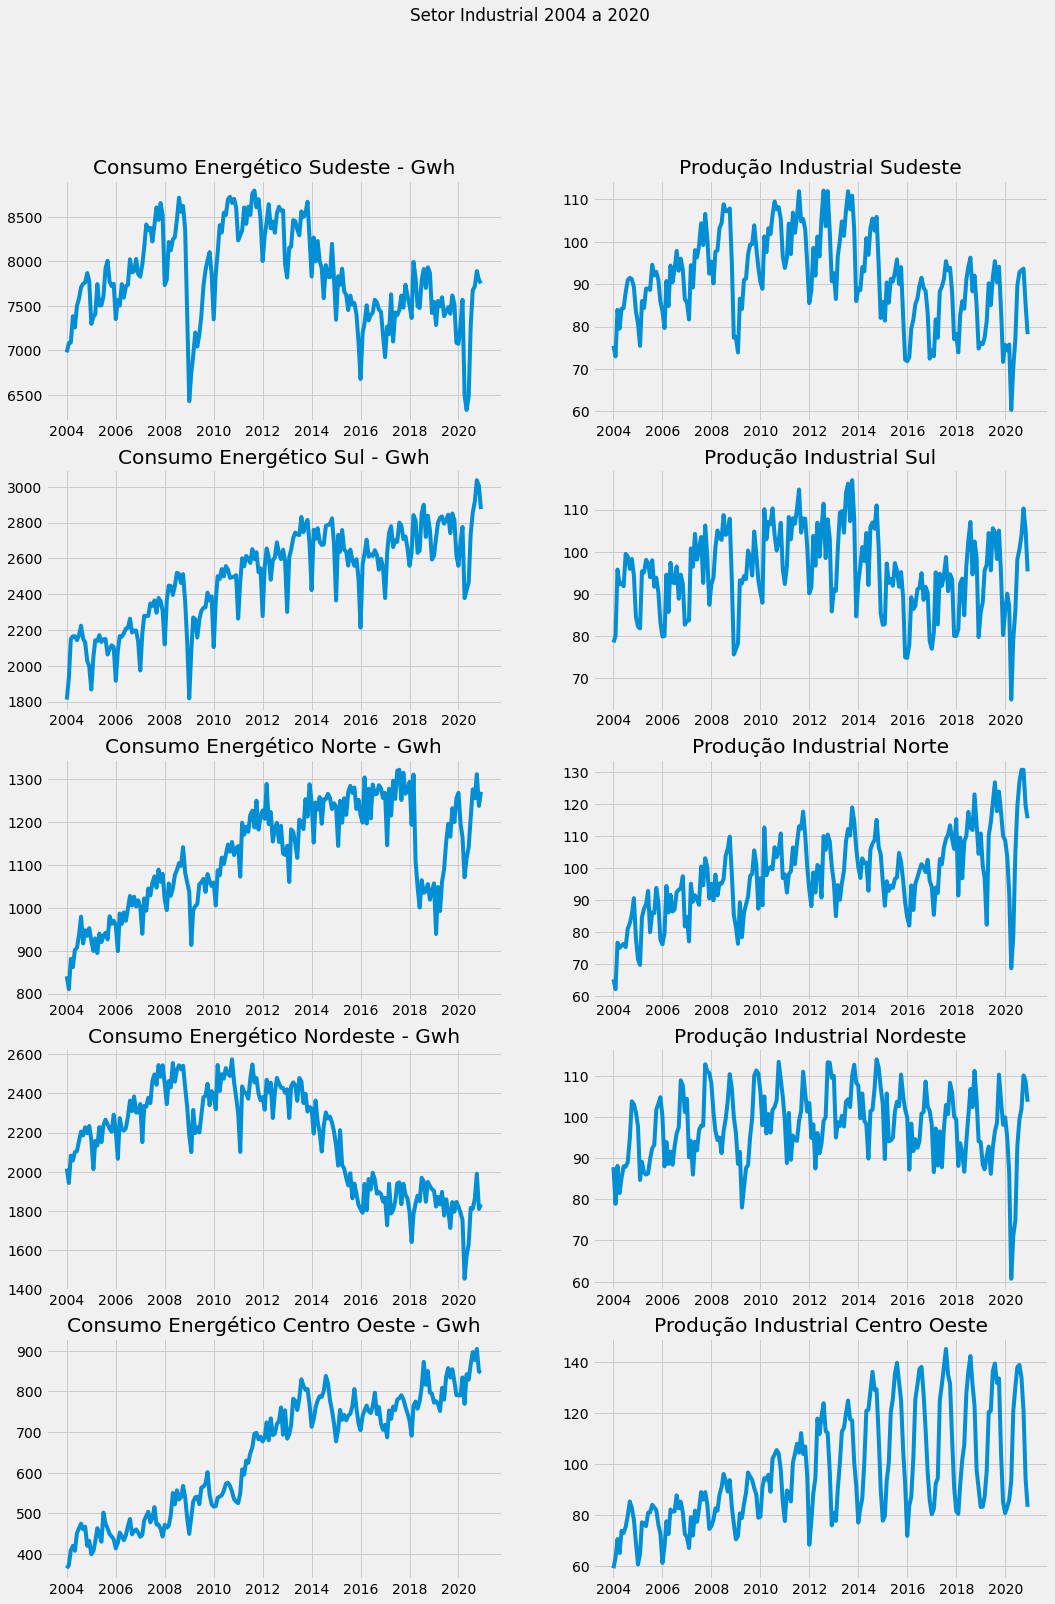

In [8]:
# Visualizando Consumo energético industrial e Produção Industrial de Jan/2004 a Dez/20020
fig, axs = plt.subplots(5,2,figsize=(16,24))

fig.suptitle('Setor Industrial 2004 a 2020')

# SUDESTE
axs[0,0].plot(df_sudeste.index, df_sudeste['Consumo_Ind'])
axs[0,1].plot(df_sudeste.index, df_sudeste['Produção_Industrial'])
axs[0,0].title.set_text('Consumo Energético Sudeste - Gwh')
axs[0,1].title.set_text('Produção Industrial Sudeste')

# SUL
axs[1,0].plot(df_sul.index, df_sul['Consumo_Ind'])
axs[1,1].plot(df_sul.index, df_sul['Produção_Industrial'])
axs[1,0].title.set_text('Consumo Energético Sul - Gwh')
axs[1,1].title.set_text('Produção Industrial Sul')


# NORTE
axs[2,0].plot(df_norte.index, df_norte['Consumo_Ind'])
axs[2,1].plot(df_norte.index, df_norte['Produção_Industrial'])
axs[2,0].title.set_text('Consumo Energético Norte - Gwh')
axs[2,1].title.set_text('Produção Industrial Norte')


# NORDESTE
axs[3,0].plot(df_nordeste.index, df_nordeste['Consumo_Ind'])
axs[3,1].plot(df_nordeste.index, df_nordeste['Produção_Industrial'])
axs[3,0].title.set_text('Consumo Energético Nordeste - Gwh')
axs[3,1].title.set_text('Produção Industrial Nordeste')

# CENTRO OESTE
axs[4,0].plot(df_centro_oeste.index, df_centro_oeste['Consumo_Ind'])
axs[4,1].plot(df_centro_oeste.index, df_centro_oeste['Produção_Industrial'])
axs[4,0].title.set_text('Consumo Energético Centro Oeste - Gwh')
axs[4,1].title.set_text('Produção Industrial Centro Oeste')


<b>Comentários Gerais</b>
Observa-se em 2008-2009 uma queda abrupta da Produçao Industrial de todas as regiões causada pela de crise de 2008-2009 nos EUA (Falência do Lehman Brothers Bank) que atingiu o mundo todo e, em especial, o Brasil. O ano de 2010 foi marcado pela recuperação da economia em vários países, após os impactos da crise internacional de 2008 e que se arrastou por 2009. No período de 2010 a 2014 inicia-se uma plena recuperação da produção industrial, voltando a novo ciclo de declínio à partir de 2014, ano da copa do Mundo e início das operações da Lava-Jato. O ápice das paralizações industriais se deu em 2018, com grande impacto dos resultados da operaçao Lava Jato.  Em 2020 a produção industrial despenca  como consequência da pandemia de Covid-19 e pelas crises políticas que se arrastam desde 2018.

<b>Alguns pontos curiosos:</b>

1.Observa-se na região <b>Sudeste</b> que o aumento da produção industrial de 2004 a 2008 é acompanhada por um aumento do consumo energético, mostrando uma clara relação positiva entre as duas features.  Observa-se em 2008-2009 uma queda abrupta da Produçao Industrial e consequentemente do consumo energético, causado pela de crise de 2008-2009 nos EUA (Falência do Lehman Brothers Bank) que atingiu o mundo todo e, em especia, o Brasil.  A produção industrial volta a crescer em 2010, voltando a cair em 2014 quando inicia-se as operações da Lava-Jato e ano da copa do Mundo.

2.Observa-se na região <b>Sul</b> uma tendência de aumento no consumo energético industrial saindo de pouco mais de 1800GwH em 2004 para 3000Gwh em 2020, enquando a produção industrial mostra um perfil de cresciento gradual até 2014, quando então passa a cair novamente, provvelmente pelos impactos das crises políticas e copa do mundo.

3.A região <b>Centro-Oeste</b> não apresentou quedra no consumo energético significativo no período de 2008 a 2009(crise mundial), assim como também não parece ter sido afetada de forma significativa pela crise política que iniciou-se em 2014 e tampouco queda de consumo no período da Pandemia de Covid-19.  Ao contrário, é uma região com crescente consumo energético apesar da produçao industrial da região oscilar de forma praticamente constante à partir de 2012, alternando altos e baixos de produção industrial. Rápida pesquisa na internet mostrou que é uma região com alto crescimento no consumo energético no periodo analisado. e também umas das regiões que mais investiram em geração limpa de energia.  Não está claro para mim se os dados de consumo energético incluem apenas energia proveniente de fontes não renováveis ou se inclue também fontes limpas.

4.A região <b>Nordeste</b> apresenta uma grade queda no consumo energético á partir de 2014, apesar da produção industrial oscilar de forma constante.  Não tenho informações se o consumo energético informado contempla fontes renováveis ou não, mas se não contempla então explicaria a queda no consumo energético sem a contra partida queda na produção industrial uam vez que a região pode ter substituido a geração não-renovável por fontes renováveis, como a Eólica, por exemplo.  Maiores informações são necessárias.

5.A região <b>Norte</> mostra seu grande crescimento industrial ao longos destes 17 anos, evidenciado por uma curva ingreme de crescimento no consumo energético acompanhando a alta na produção industrial no período de 2004 a 2014.  Após 2014, novamente, esta regição mostra uma queda abrupta na produçao industrial, não acompanhando por redução no consumo energético, chegando ao ponto mais baixo em 2020, ano da pandemia de Covid-19.

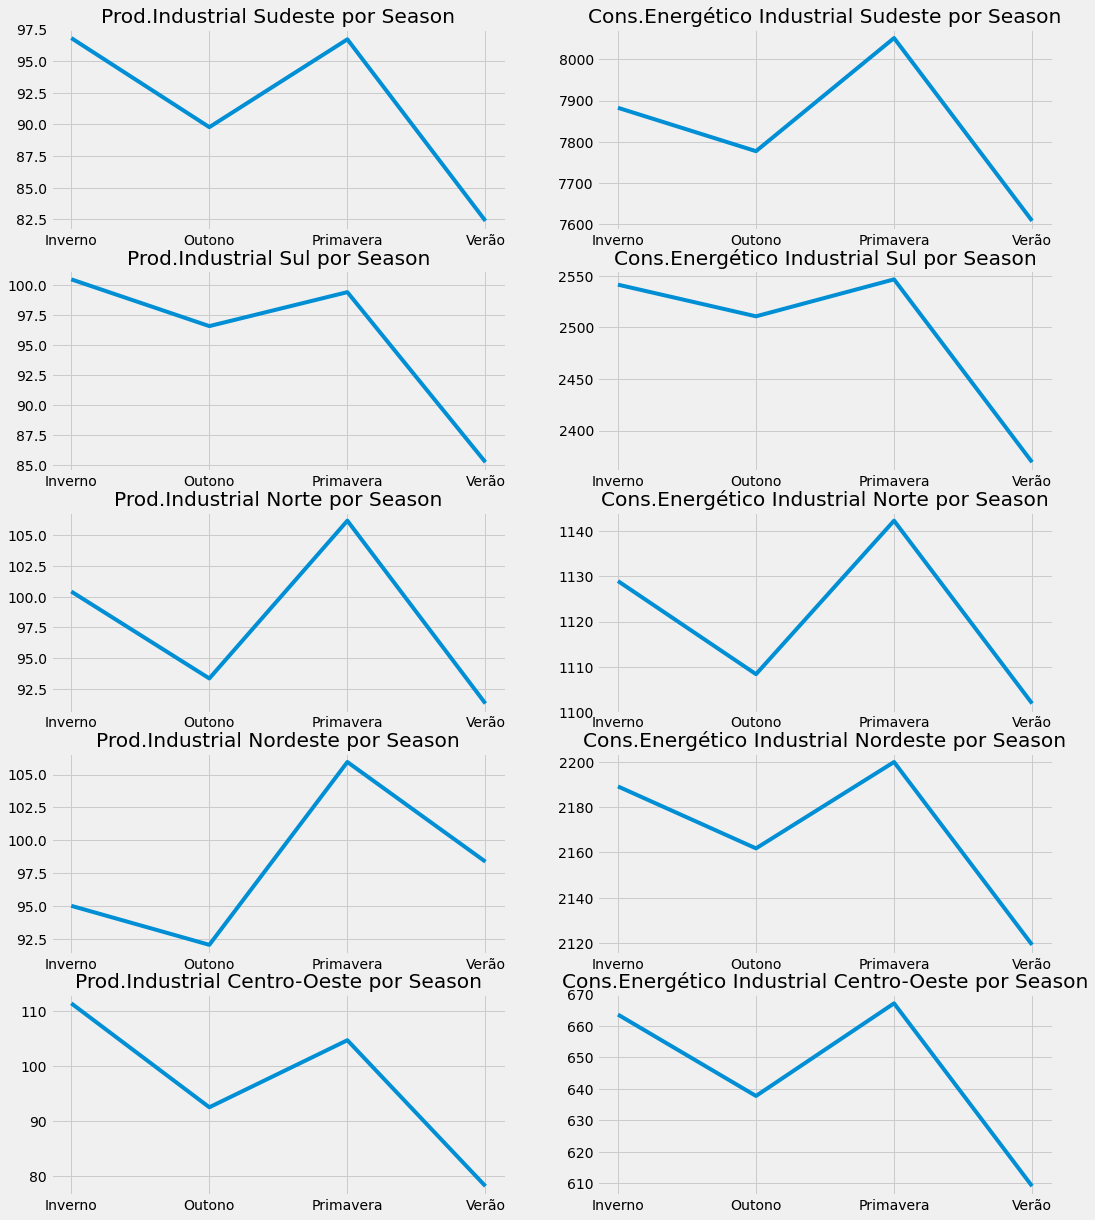

In [9]:
# Análise setor industrial por estação climática

fig, axs = plt.subplots(5,2,figsize=(16,20))

# SUDESTE
pri_se = df_sudeste.groupby("Estação_Ano")["Produção_Industrial"].mean()
con_se= df_sudeste.groupby("Estação_Ano")["Consumo_Ind"].mean()
axs[0,0].plot(pri_se)
axs[0,0].set_title("Prod.Industrial Sudeste por Season")
axs[0,1].plot(con_se)
axs[0,1].set_title("Cons.Energético Industrial Sudeste por Season")

# SUL
pri_s = df_sul.groupby("Estação_Ano")["Produção_Industrial"].mean()
con_s= df_sul.groupby("Estação_Ano")["Consumo_Ind"].mean()
axs[1,0].plot(pri_s)
axs[1,0].set_title("Prod.Industrial Sul por Season")
axs[1,1].plot(con_s)
axs[1,1].set_title("Cons.Energético Industrial Sul por Season")

# NORTE
pri_n = df_norte.groupby("Estação_Ano")["Produção_Industrial"].mean()
con_n= df_norte.groupby("Estação_Ano")["Consumo_Ind"].mean()
axs[2,0].plot(pri_n)
axs[2,0].set_title("Prod.Industrial Norte por Season")
axs[2,1].plot(con_n)
axs[2,1].set_title("Cons.Energético Industrial Norte por Season")

# NORDESTE
pri_ne = df_nordeste.groupby("Estação_Ano")["Produção_Industrial"].mean()
con_ne= df_nordeste.groupby("Estação_Ano")["Consumo_Ind"].mean()
axs[3,0].plot(pri_ne)
axs[3,0].set_title("Prod.Industrial Nordeste por Season")
axs[3,1].plot(con_ne)
axs[3,1].set_title("Cons.Energético Industrial Nordeste por Season")

# CENTRO-OESTE
pri_co = df_centro_oeste.groupby("Estação_Ano")["Produção_Industrial"].mean()
con_co= df_centro_oeste.groupby("Estação_Ano")["Consumo_Ind"].mean()
axs[4,0].plot(pri_co)
axs[4,0].set_title("Prod.Industrial Centro-Oeste por Season")
axs[4,1].plot(con_co)
axs[4,1].set_title("Cons.Energético Industrial Centro-Oeste por Season")



plt.show()

<b>Comentários Gerais</b>: As 5 regiões analisadas apresentam comportamento semelhante quando estudamos o impacto da estação climática na produção industrial versus consumo energético:

1.O pico da produção ocorre na <b>primavera</b>, provavelmente antecipando-se às férias e paralizações  que ocorrem no verão devido às férias de funcionários.

2.Com exceção do <b>Nordeste</b> todas as regiões possuem no <b>verão</b> a estação de menor produção industrial e consumo energético.  Concluo que o fenômeno não ocorra com o verão nordestino uma vez que é justamente nesta estação que a região recebe muitos turistas vindos das outras 4 regiões. É no <b>outono</b> que a região apresenta sua menor atividade de produção industrial.

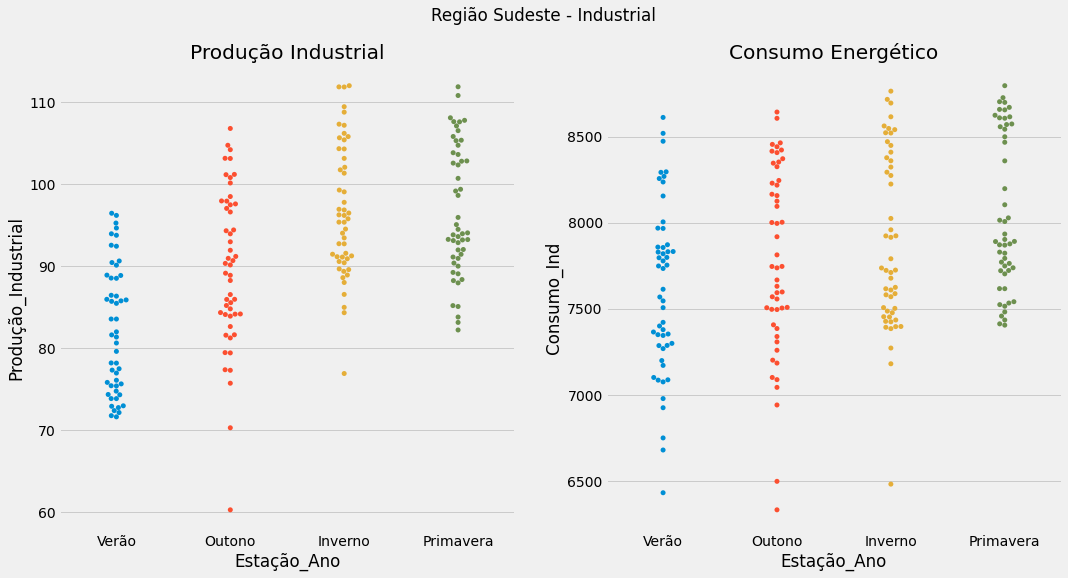

In [10]:
f, ax = plt.subplots(1,2,figsize=(16, 8))
f.suptitle('Região Sudeste - Industrial')
sns.swarmplot(x="Estação_Ano", y="Produção_Industrial", data=df_sudeste,ax=ax[0]).set_title('Produção Industrial')
sns.swarmplot(x="Estação_Ano", y="Consumo_Ind", data=df_sudeste,ax=ax[1]).set_title('Consumo Energético')
plt.show()

Aqui analiso a região sudeste, levando-se em consideraçao apenas a estação climática:  Como análise geral, primavera é a estação de maior média histórica de produção industrial e o verão a estação de menor produção industrial.

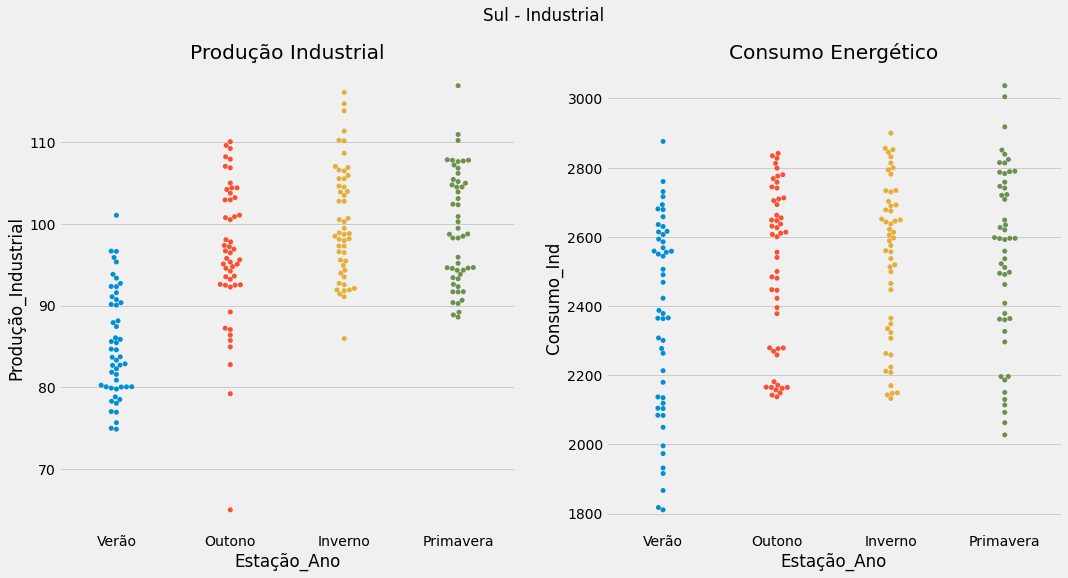

In [11]:
f, ax = plt.subplots(1,2,figsize=(16, 8))
f.suptitle('Sul - Industrial')
sns.swarmplot(x="Estação_Ano", y="Produção_Industrial", data=df_sul,ax=ax[0]).set_title('Produção Industrial')
sns.swarmplot(x="Estação_Ano", y="Consumo_Ind", data=df_sul,ax=ax[1]).set_title('Consumo Energético')
plt.show()

A análise da região Sul é muito semelhante a análise ds região Sudeste:  alta produção e demanda energética na primavera e queda no verão.  

<b>Importante</b>: A produção Industrial da região sudeste, na primavera, varia entre 80 e 110(unidades ?) com consumo energético variando entre 7.500 e 9000 Gwh.  A produção da região Sul, também na primavera, varia entre 90 e 110(unidades ?) mas com consumo energético variando entre 2000 e 3000 Gwh, ou seja, para atingir basicamente a mesma quantidade de produção industrial, a região Sudeste consome de 2.5 a 3.0 vezes mais energia. 

<b>Diante desse fato curioso, algumas pontos precisam ser comentados:</b>

<i>
1. Não acredito que o parque fabril da região sudeste seja menos eficiente em consumo energético que a região sul, portanto:
    
2. Posso concluir que a produção da região sudeste seja mais complexa, ou energéticamente falando, processos que demandem mais energia e, portanto são produtos de maior valor agregado e:
    
3. O impacto da produção do Sudeste no PIB estado seja maior que a produção do Sul.
</i>

Aqui está uma grande oportunidade de detalhamento, visando entender o porque destas diferenças no consumo energético dos dois estados, analisados na mesma estação climática.

Devido ao tempo apertado para realizar este teste, não farei a mesma análise para as demais regiões. Ficará como next-steps ;-)

In [12]:
se=df_base['pim_se'].mean().round(2)
s=df_base['pim_s'].mean().round(2)
n=df_base['pim_n'].mean().round(2)
co=df_base['pim_co'].mean().round(2)
ne=df_base['pim_ne'].mean().round(2)
print("A média de produção industrial do Sudeste foi de {}".format(se))
print("A média de produção industrial do Sul foi de {}".format(s))
print("A média de produção industrial do Norte foi de {}".format(n))
print("A média de produção industrial do Nordeste foi de {}".format(ne))
print("A média de produção industrial do Centro-Oeste foi de {}".format(co))
print("")
se=df_base['pim_se'].sum().round(2)
s=df_base['pim_s'].sum().round(2)
n=df_base['pim_n'].sum().round(2)
co=df_base['pim_co'].sum().round(2)
ne=df_base['pim_ne'].sum().round(2)
print("O total de produção industrial do Sudeste foi de {}".format(se))
print("O total de produção industrial do Sul foi de {}".format(s))
print("O total de produção industrial do Norte foi de {}".format(n))
print("O total de produção industrial do Nordeste foi de {}".format(ne))
print("O total de produção industrial do Centro-Oeste foi de {}".format(co))

A média de produção industrial do Sudeste foi de 90.9
A média de produção industrial do Sul foi de 96.3
A média de produção industrial do Norte foi de 99.17
A média de produção industrial do Nordeste foi de 97.56
A média de produção industrial do Centro-Oeste foi de 97.83

O total de produção industrial do Sudeste foi de 20725.53
O total de produção industrial do Sul foi de 21956.05
O total de produção industrial do Norte foi de 22611.34
O total de produção industrial do Nordeste foi de 22242.55
O total de produção industrial do Centro-Oeste foi de 22304.19


Achei curioso os gráficos apontarem que a região Sudeste é a região de menor produçao industrial média e total considerando os anos de 2004 a 2020 por isso resolvi calcular a média de produção por região ao longo deste 17 anos assim como a produção total  do período. Não foi informado a qual setor industrial referem-se estes dados, precisaria desta informação para saber se a base está com dados equivocados ou não, uma vez que o setor Sudeste é a região que concentra mais da metade da produção industrial do Brasil e a planiha fornecida não mostra este fato.

## Análise Setor Comercial

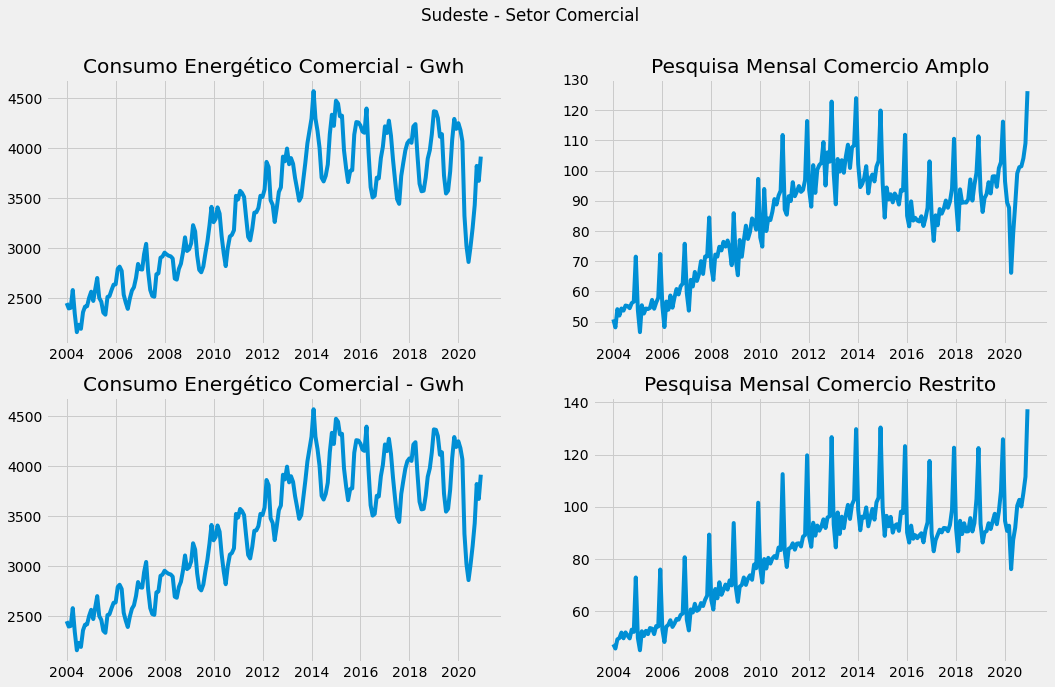

In [13]:
# Visualizando Consumo energético Comercial e Pesquisa de Mercado Restrito de Jan/2004 a Dez/20020
fig, axs = plt.subplots(2,2,figsize=(16,10))
fig.suptitle('Sudeste - Setor Comercial')

axs[0,0].plot(df_sudeste.index, df_sudeste['Consumo_Com'])
axs[0,1].plot(df_sudeste.index, df_sudeste['Pesq_Mensal_Com_A'])
axs[1,0].plot(df_sudeste.index, df_sudeste['Consumo_Com'])
axs[1,1].plot(df_sudeste.index, df_sudeste['Pesq_Mensal_Com_R'])

axs[0,0].title.set_text('Consumo Energético Comercial - Gwh')
axs[0,1].title.set_text('Pesquisa Mensal Comercio Amplo')
axs[1,0].title.set_text('Consumo Energético Comercial - Gwh')
axs[1,1].title.set_text('Pesquisa Mensal Comercio Restrito')

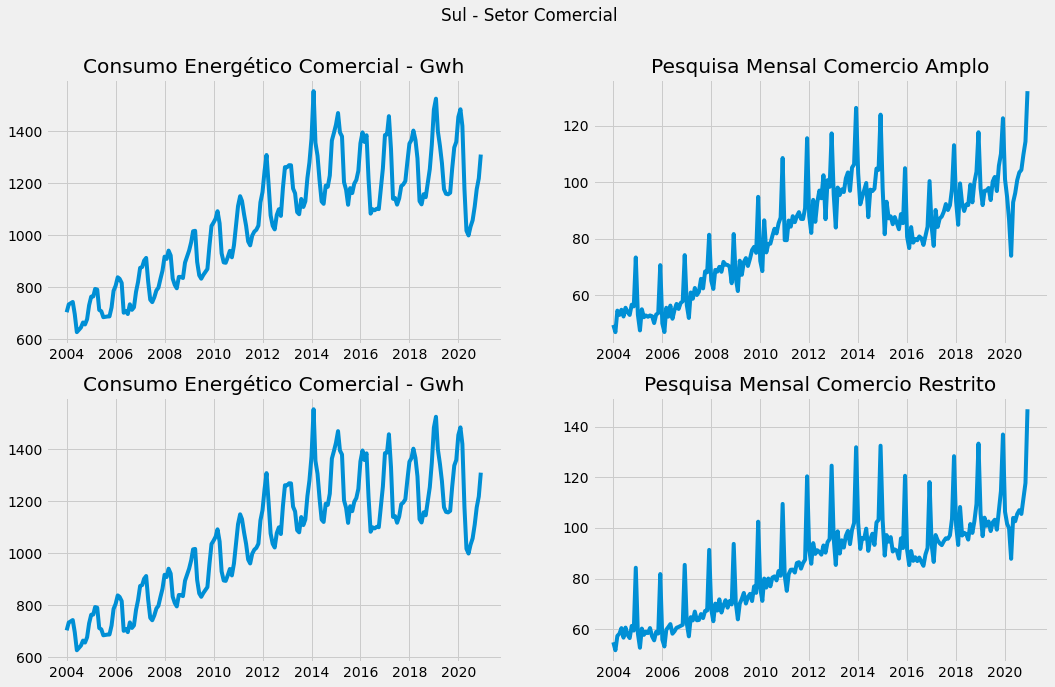

In [14]:
# Visualizando Consumo energético Comercial e Pesquisa de Mercado Restrito de Jan/2004 a Dez/20020
fig, axs = plt.subplots(2,2,figsize=(16,10))
fig.suptitle('Sul - Setor Comercial')

axs[0,0].plot(df_sul.index, df_sul['Consumo_Com'])
axs[0,1].plot(df_sul.index, df_sul['Pesq_Mensal_Com_A'])
axs[1,0].plot(df_sul.index, df_sul['Consumo_Com'])
axs[1,1].plot(df_sul.index, df_sul['Pesq_Mensal_Com_R'])

axs[0,0].title.set_text('Consumo Energético Comercial - Gwh')
axs[0,1].title.set_text('Pesquisa Mensal Comercio Amplo')
axs[1,0].title.set_text('Consumo Energético Comercial - Gwh')
axs[1,1].title.set_text('Pesquisa Mensal Comercio Restrito')

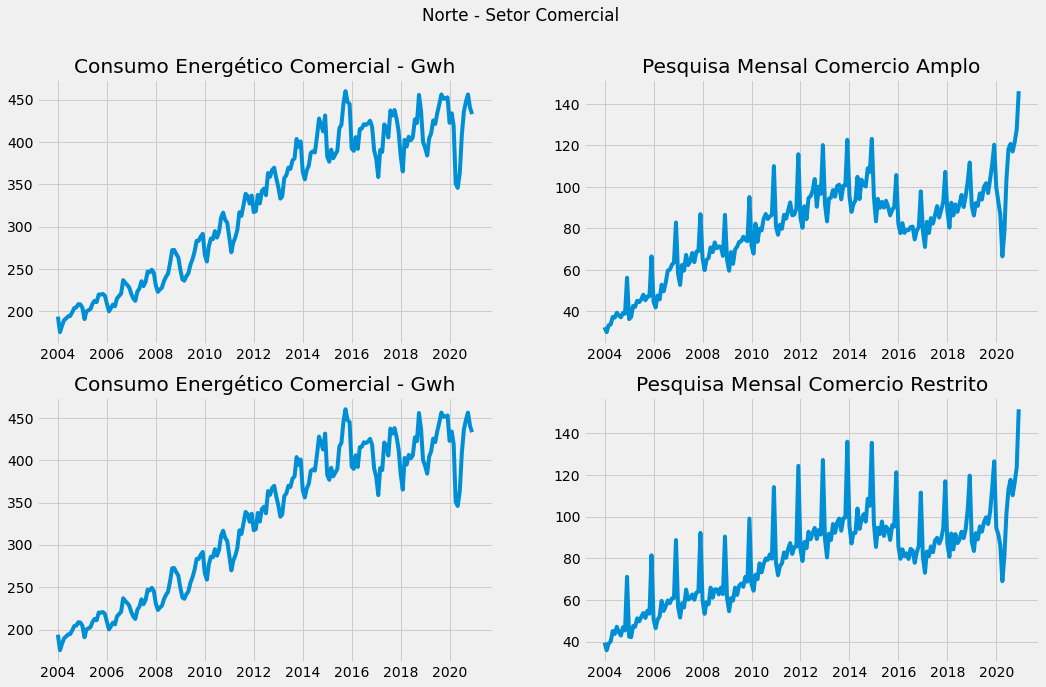

In [15]:
# Visualizando Consumo energético Comercial e Pesquisa de Mercado Restrito de Jan/2004 a Dez/20020
fig, axs = plt.subplots(2,2,figsize=(16,10))
fig.suptitle('Norte - Setor Comercial')

axs[0,0].plot(df_norte.index, df_norte['Consumo_Com'])
axs[0,1].plot(df_norte.index, df_norte['Pesq_Mensal_Com_A'])
axs[1,0].plot(df_norte.index, df_norte['Consumo_Com'])
axs[1,1].plot(df_norte.index, df_norte['Pesq_Mensal_Com_R'])

axs[0,0].title.set_text('Consumo Energético Comercial - Gwh')
axs[0,1].title.set_text('Pesquisa Mensal Comercio Amplo')
axs[1,0].title.set_text('Consumo Energético Comercial - Gwh')
axs[1,1].title.set_text('Pesquisa Mensal Comercio Restrito')

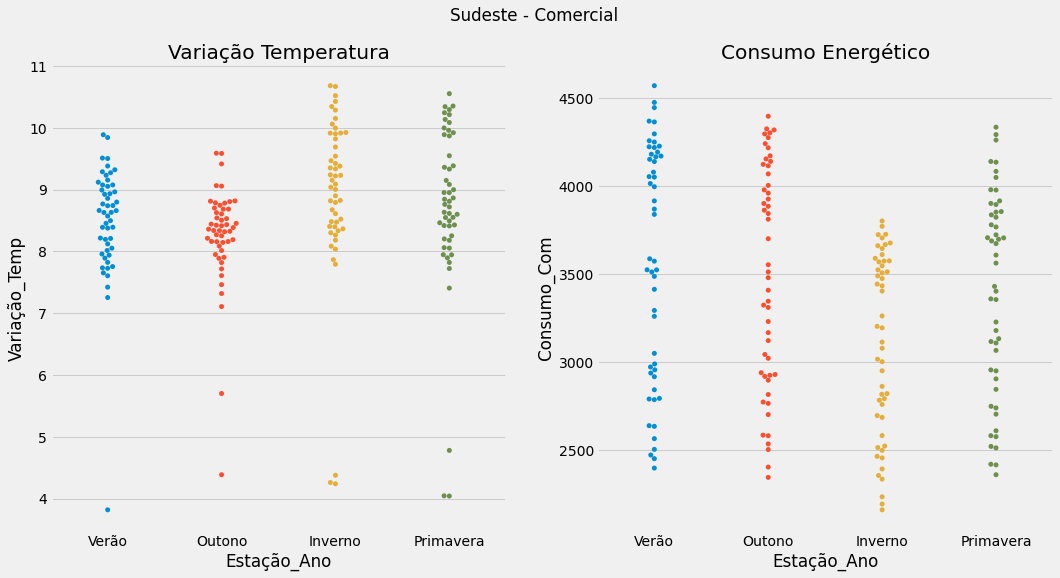

In [16]:
f, ax = plt.subplots(1,2,figsize=(16, 8))
f.suptitle('Sudeste - Comercial')
sns.swarmplot(x="Estação_Ano", y="Variação_Temp", data=df_sudeste,ax=ax[0]).set_title('Variação Temperatura')
sns.swarmplot(x="Estação_Ano", y="Consumo_Com", data=df_sudeste,ax=ax[1]).set_title('Consumo Energético')
plt.show()

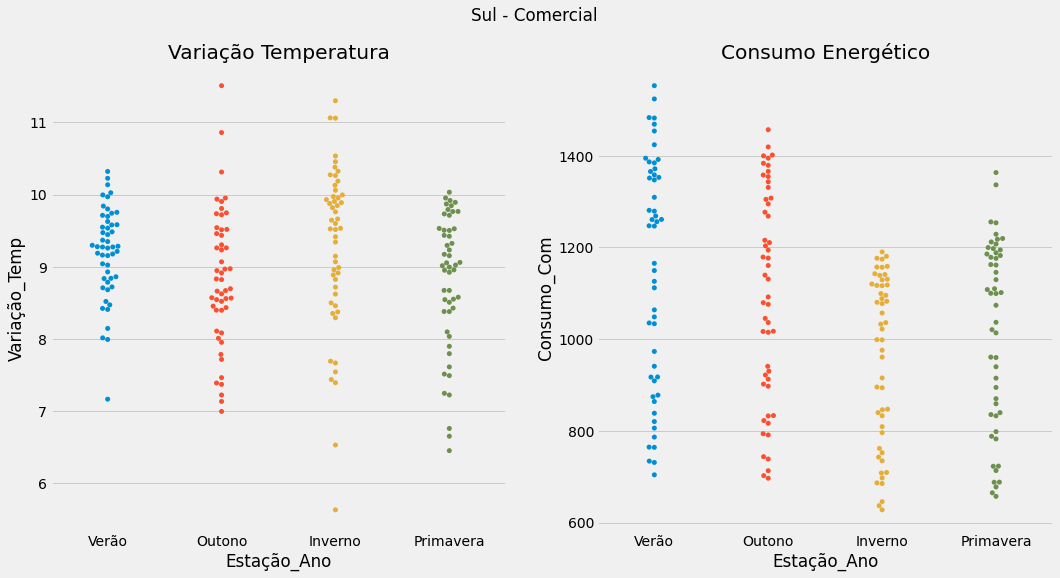

In [17]:
f, ax = plt.subplots(1,2,figsize=(16, 8))
f.suptitle('Sul - Comercial')
sns.swarmplot(x="Estação_Ano", y="Variação_Temp", data=df_sul,ax=ax[0]).set_title('Variação Temperatura')
sns.swarmplot(x="Estação_Ano", y="Consumo_Com", data=df_sul,ax=ax[1]).set_title('Consumo Energético')
plt.show()

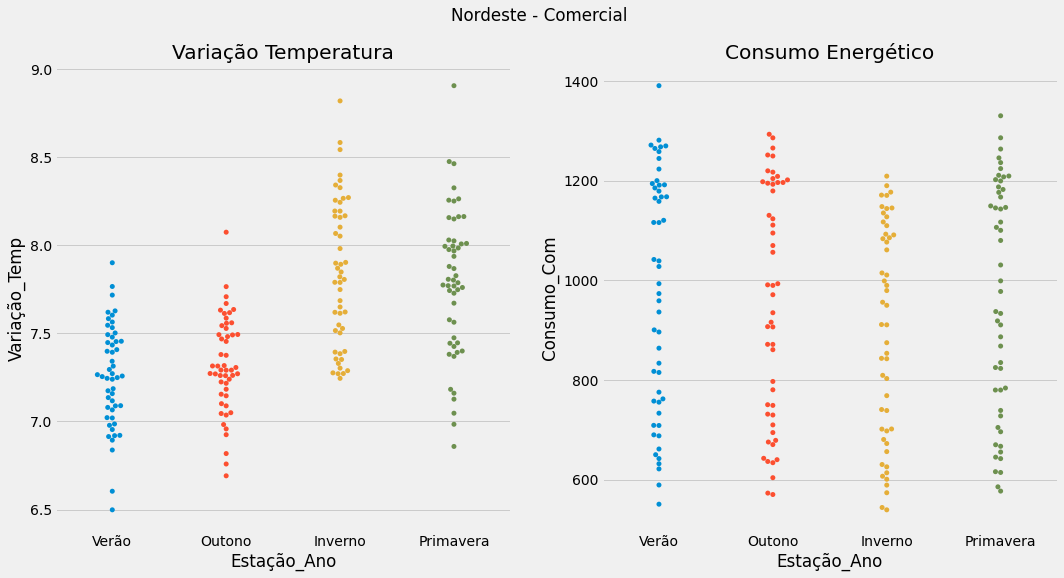

In [18]:
f, ax = plt.subplots(1,2,figsize=(16, 8))
f.suptitle('Nordeste - Comercial')
sns.swarmplot(x="Estação_Ano", y="Variação_Temp", data=df_nordeste,ax=ax[0]).set_title('Variação Temperatura')
sns.swarmplot(x="Estação_Ano", y="Consumo_Com", data=df_nordeste,ax=ax[1]).set_title('Consumo Energético')
plt.show()

Como comentários gerais, a região Sul e Sudeste apresentam maior amplitude térmica com consumo enérgico maior no verão, provavelmente devido sistemas de refrigerão das lojas em geral.  Consumo energético comercial da região sudeste é o maior do Brasil o que era de se esperar dado ser a região mais populosa.  Existe uma clara relação positiva entre o aumento do indice da Pesquisa de Mercado Ampla e Restrita com aumento do consumo energético, indicando aumento no consumo da população por bens e serviços, o que "aquece" o setor comercial.  Mais uma vez o fenômeno da pandemia de Covid-19 impacta o setor comercial, observado pela queda no consumo á partir de 2020.

## Análise Setor Residencial

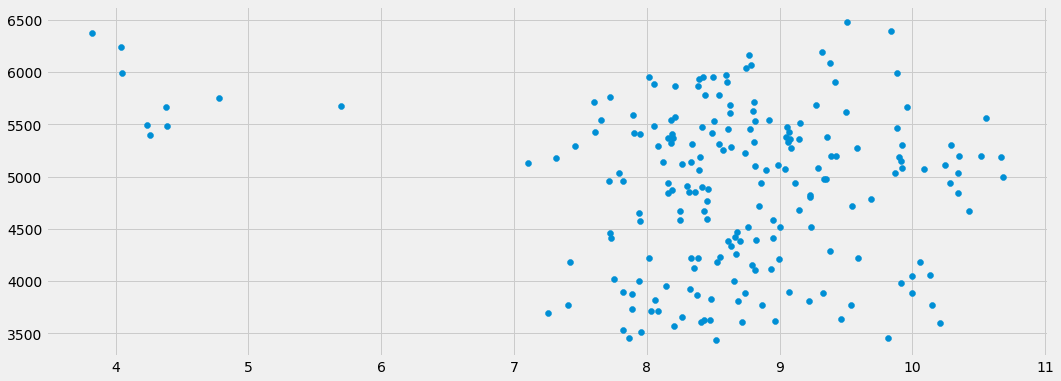

In [19]:
plt.figure(figsize=[16,6])
plt.scatter(df_sudeste['Variação_Temp'], df_sudeste['Consumo_Res'])
plt.show()

Gráfico que mostra como a região sudeste apresenta grande amplitude climática ao longo dos meses. O ideal aqui seria fazer uma análise dia-a-dia, mas o gráfico é aderente com a experiência que tenho em São Paulo por exemplo, onde a diferença entre temperatura máxina e mínima, em um mesmo dia, pode atingir diferenças de 7 a 11 graus celsius.

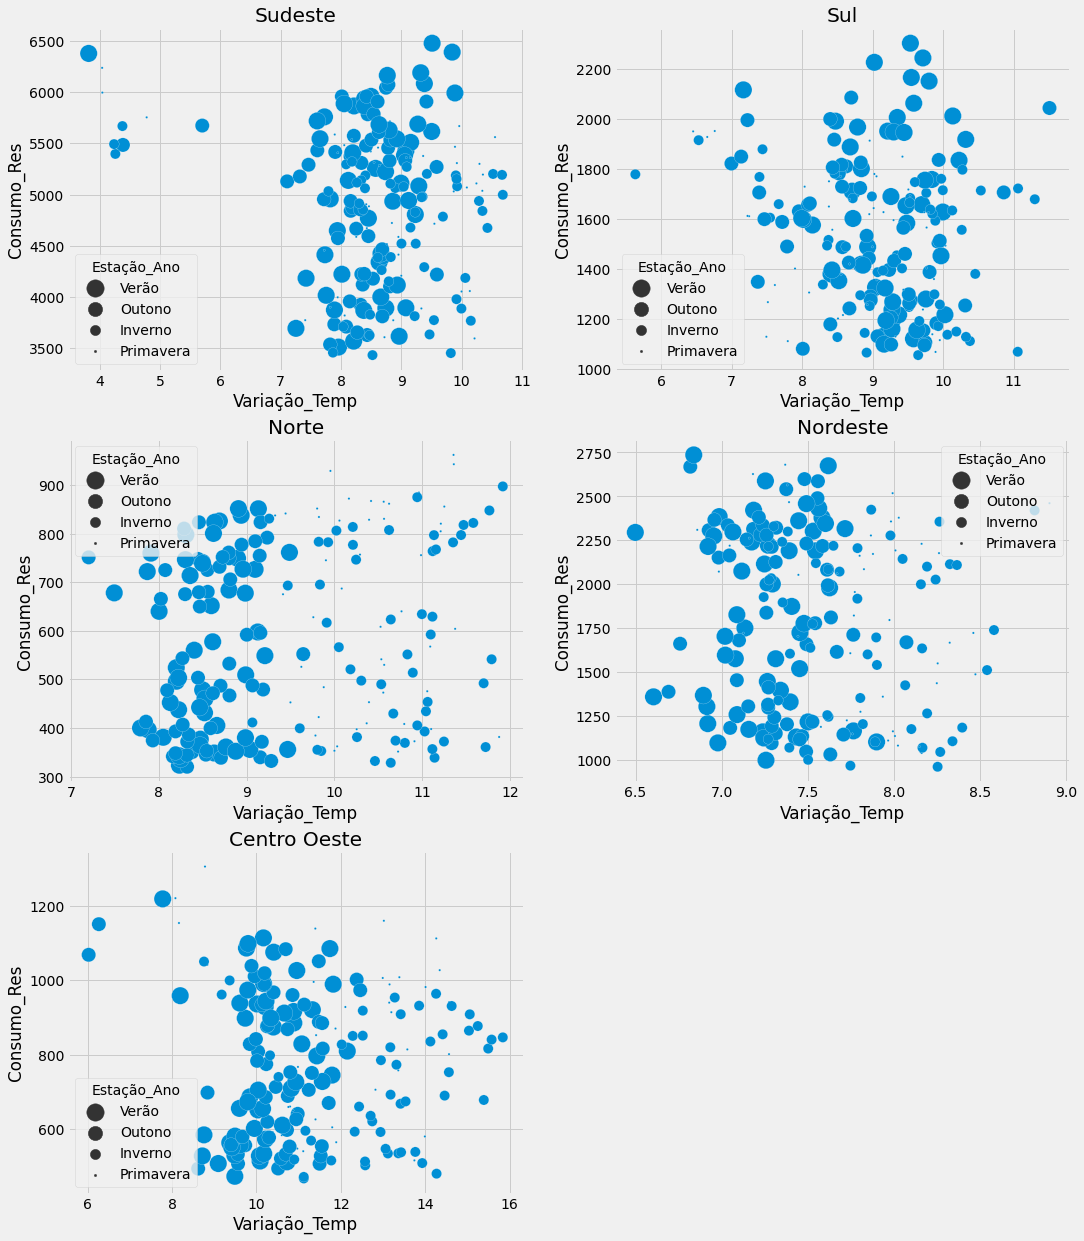

In [20]:
f, ax = plt.subplots(3,2,figsize=(16, 20))
sns.scatterplot(x="Variação_Temp", y="Consumo_Res", size="Estação_Ano", sizes=(5, 300), data=df_sudeste, ax=ax[0,0]).set_title('Sudeste')
sns.scatterplot(x="Variação_Temp", y="Consumo_Res", size="Estação_Ano", sizes=(5, 300), data=df_sul, ax=ax[0,1]).set_title('Sul')

sns.scatterplot(x="Variação_Temp", y="Consumo_Res", size="Estação_Ano", sizes=(5, 300), data=df_norte, ax=ax[1,0]).set_title('Norte')
sns.scatterplot(x="Variação_Temp", y="Consumo_Res", size="Estação_Ano", sizes=(5, 300), data=df_nordeste, ax=ax[1,1]).set_title('Nordeste')
sns.scatterplot(x="Variação_Temp", y="Consumo_Res", size="Estação_Ano", sizes=(5, 300), data=df_centro_oeste, ax=ax[2,0]).set_title('Centro Oeste')
f.delaxes(ax[2,1])

Todas as regiões mostram aumento no consumo energético no Verão e o menor consumo energético na primavera, seguido do inverno. A região nordeste apresenta menor amplitude térmica com temperaturas bem definidas dentro de uma mesma estação do ano, o que não acontece no Centro Oeste, por exemplo, região que apresenta a maior amplitude térmica entre as 5 regiões analisadas, 

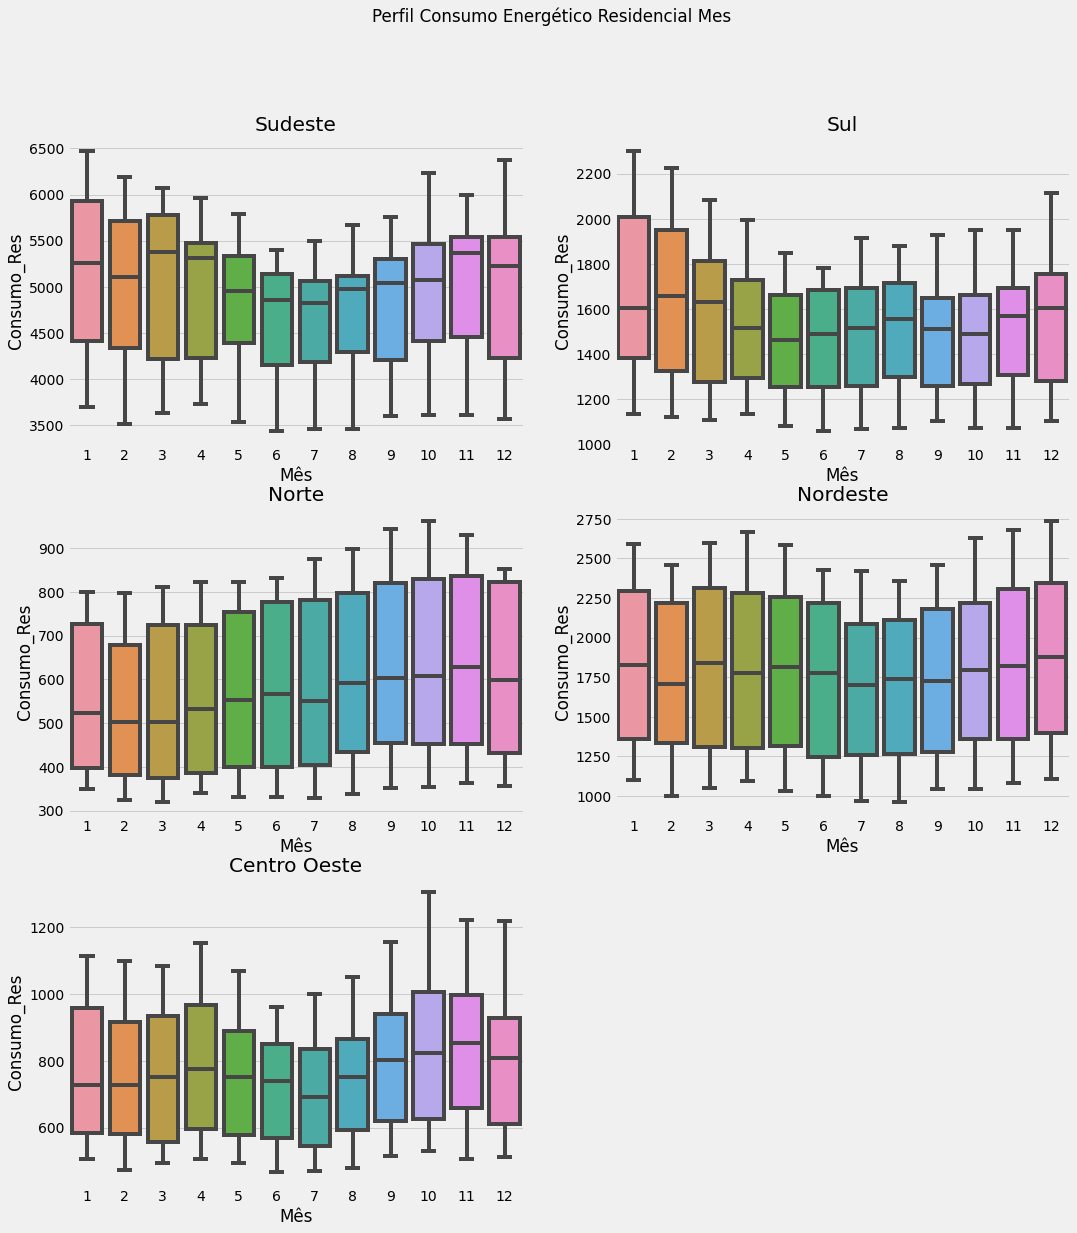

In [21]:
f, ax = plt.subplots(3,2,figsize=(16, 18))
f.suptitle('Perfil Consumo Energético Residencial Mes')
sns.boxplot(x="Mês", y="Consumo_Res", data=df_sudeste, ax=ax[0,0]).set_title('Sudeste')
sns.boxplot(x="Mês", y="Consumo_Res", data=df_sul, ax=ax[0,1]).set_title('Sul')
sns.boxplot(x="Mês", y="Consumo_Res", data=df_norte, ax=ax[1,0]).set_title('Norte')
sns.boxplot(x="Mês", y="Consumo_Res", data=df_nordeste, ax=ax[1,1]).set_title('Nordeste')
sns.boxplot(x="Mês", y="Consumo_Res", data=df_centro_oeste, ax=ax[2,0]).set_title('Centro Oeste')
f.delaxes(ax[2,1])

plt.show()

Os box-plots também nos entregam informações interessantes:

1. A região Norte possui um tendência de aumento do consumo energético ao longo dos meses do ano.
2. Com exceção do Norte, as outras 4 regiões possuem menor consumo energético residencial no meses de junho e Julho, inverno.
3. A região sudeste apresenta a maior variação de consumo ao longo do ano, quando comparada às demais regiões, provavelmente como consequencia da já vista alta amplitude térmica que a região apresenta.

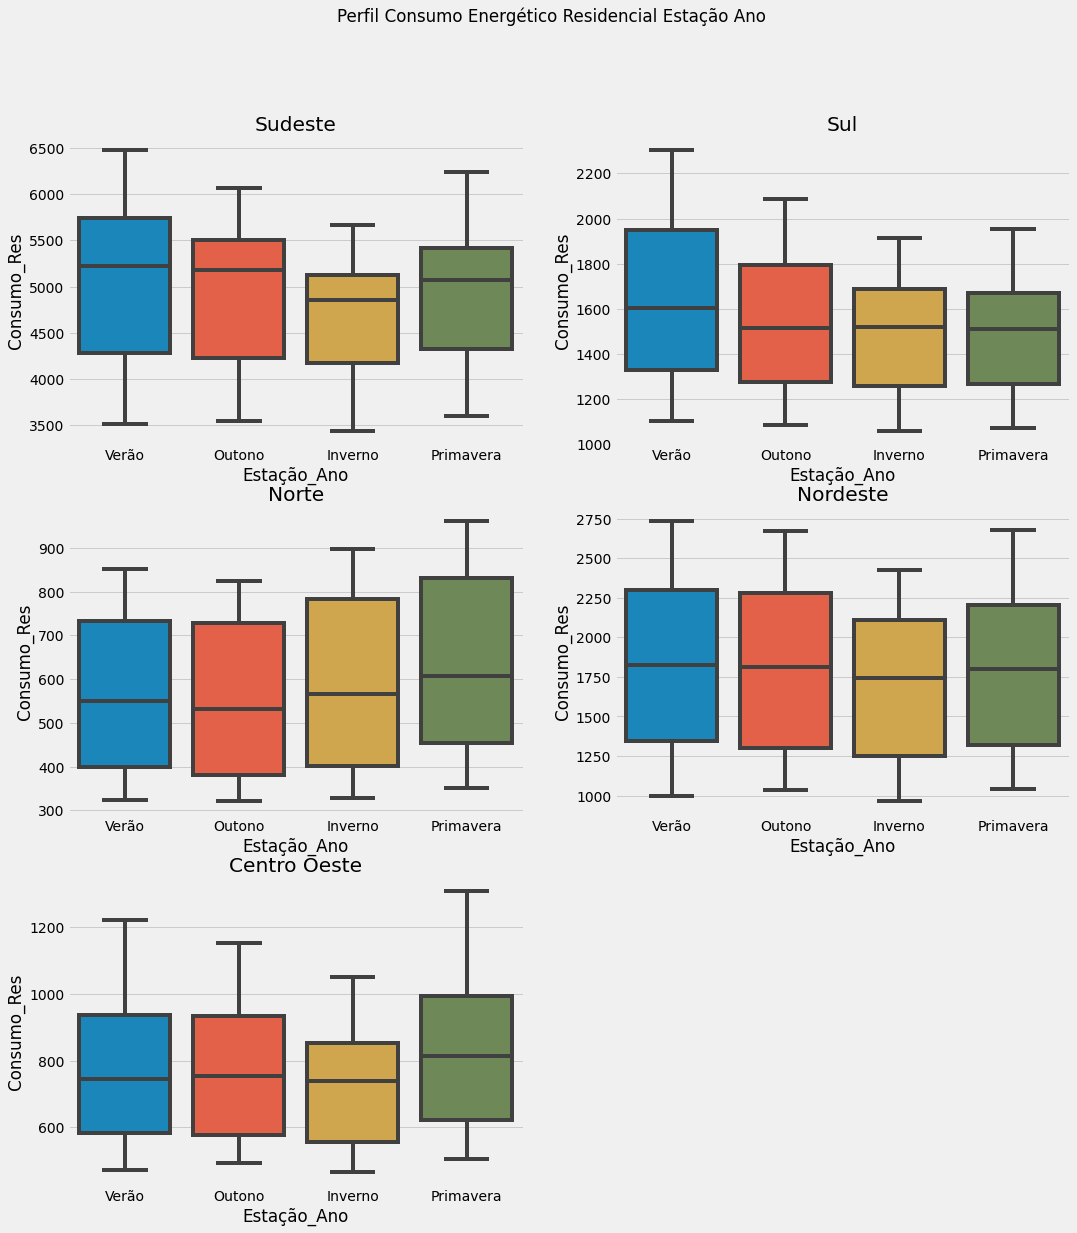

In [22]:
f, ax = plt.subplots(3,2,figsize=(16, 18))
f.suptitle('Perfil Consumo Energético Residencial Estação Ano')
sns.boxplot(x="Estação_Ano", y="Consumo_Res", data=df_sudeste, ax=ax[0,0]).set_title('Sudeste')
sns.boxplot(x="Estação_Ano", y="Consumo_Res", data=df_sul, ax=ax[0,1]).set_title('Sul')
sns.boxplot(x="Estação_Ano", y="Consumo_Res", data=df_norte, ax=ax[1,0]).set_title('Norte')
sns.boxplot(x="Estação_Ano", y="Consumo_Res", data=df_nordeste, ax=ax[1,1]).set_title('Nordeste')
sns.boxplot(x="Estação_Ano", y="Consumo_Res", data=df_centro_oeste, ax=ax[2,0]).set_title('Centro Oeste')
f.delaxes(ax[2,1])

plt.show()

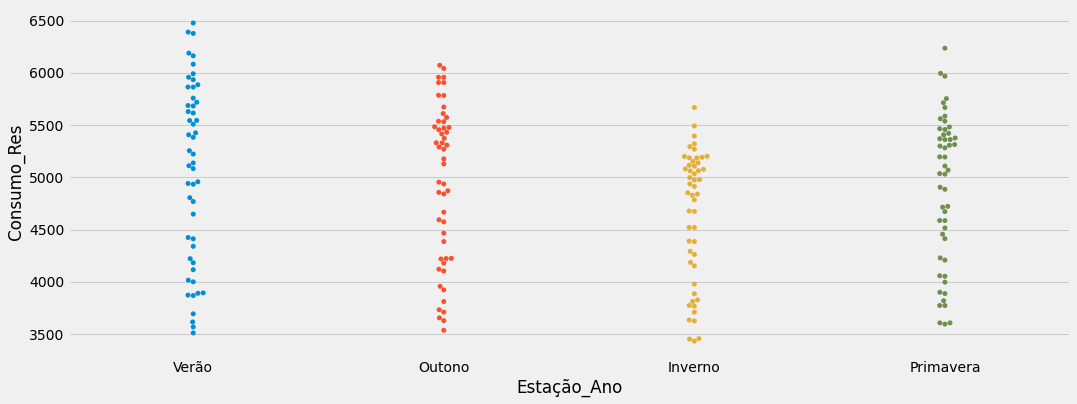

In [23]:
f, ax = plt.subplots(figsize=(16, 6))
sns.swarmplot(x="Estação_Ano", y="Consumo_Res", data=df_sudeste,ax=ax)
plt.show()

## Previsão do Consumo Energético Industrial Sudeste 24 meses ahead

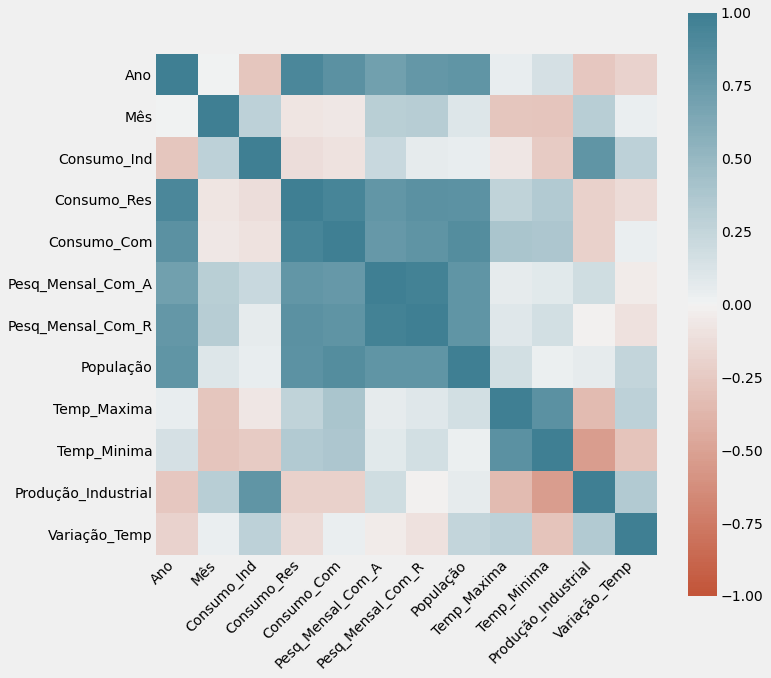

In [24]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr = df_sudeste.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

O heatmap acima mostra que o consumo energético industrial possui forte relaçao com as seguintes features:

1.Produção Industrial
2.Variação Temperatura
3.Mês
4.Pesquisa Mensal Comercial Ampla

In [25]:
# Convertando a String Estaçao do Ano de volta a númerica
df_sudeste['Estação_Ano'] = (df_sudeste.index.month%12 + 3)//3

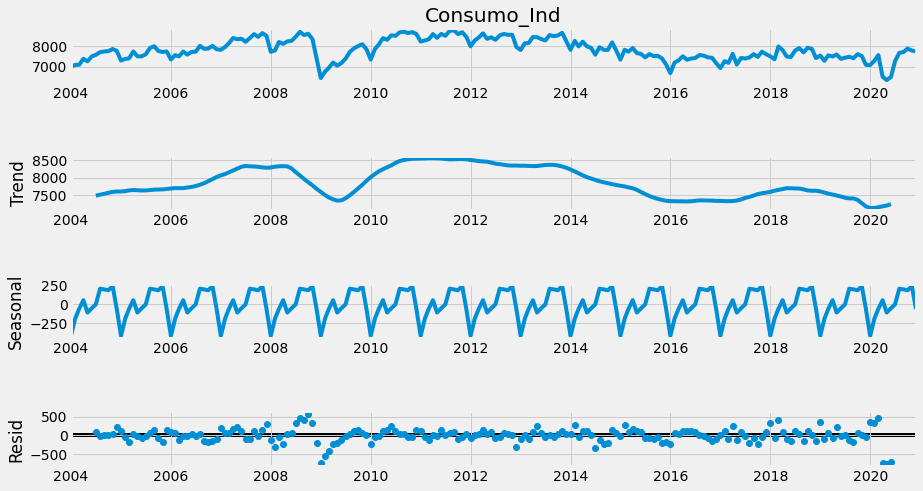

In [26]:
df = df_sudeste.copy()
#print(df.info())
df = df.astype(float)
res = sm.tsa.seasonal_decompose(df['Consumo_Ind'],period=12)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [27]:
res = sm.tsa.adfuller(df['Consumo_Ind'], regression='nc')
print('p-value {}'.format(res[1]))

p-value 0.6556735997365615


In [28]:
res = sm.tsa.adfuller(df['Consumo_Ind'].diff().dropna(), regression='nc')
print('p-value {}'.format(res[1]))

p-value 0.0005066672972480502


## Método Sarimax

In [29]:
df_sudeste.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2004-01-01 to 2020-12-01
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ano                  204 non-null    int64  
 1   Mês                  204 non-null    int64  
 2   Estação_Ano          204 non-null    int64  
 3   Consumo_Ind          204 non-null    float64
 4   Consumo_Res          204 non-null    float64
 5   Consumo_Com          204 non-null    float64
 6   Pesq_Mensal_Com_A    204 non-null    float64
 7   Pesq_Mensal_Com_R    204 non-null    float64
 8   População            204 non-null    float64
 9   Temp_Maxima          204 non-null    float64
 10  Temp_Minima          204 non-null    float64
 11  Produção_Industrial  204 non-null    float64
 12  Variação_Temp        204 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 22.3 KB


In [30]:
#Utilizei para definição dos melhores parâmetros para o auto_arima

Sarimax_model = auto_arima(df_sudeste['Consumo_Ind'],
                       start_P=1,
                       start_q=1,
                       max_p=3,
                       max_q=3,
                       m=12,
                       seasonal=True,
                       d=None,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
Sarimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=2663.428, Time=1.21 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2929.724, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2661.610, Time=0.47 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2783.966, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2927.848, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2683.874, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2657.401, Time=1.09 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=2658.989, Time=1.65 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=2659.468, Time=0.43 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2923.941, Time=0.84 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2659.230, Time=1.60 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2659.219, Time=1.25 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2782.136, Time=1.03 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=2656.354, Time=3.15 sec
 ARIMA(2,0,1)(1,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(1, 0, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -1317.113
Date:                                 Tue, 22 Jun 2021   AIC                           2650.227
Time:                                         12:20:49   BIC                           2676.287
Sample:                                              0   HQIC                          2660.781
                                                 - 204                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.2778     29.105     -0.078      0.938     -59.323      54.767
ar.L1          0.7766      0.025     31.694      0.000       0.729       0.825
ma.L1         -0.0132      0.075     -0.177      0.860      -0.159       0.133
ar.S.L12      -0.3105      0.132     -2.356      0.018      -0.569      -0.052
ar.S.L24      -0.7656      0.080     -9.523      0.000      -0.923      -0.608
ma.S.L12       0.0622      0.135      0.463      0.644      -0.201       0.326
ma.S.L24       0.7834      0.135      5.822      0.000       0.520       1.047
sigma2      4.601e+04   3612.404     12.737      0.000    3.89e+04    5.31e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):                65.03
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.74
Prob(H) (two-sided):                  0.60   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model = SARIMAX(df_sudeste['Consumo_Ind'],order=(1, 0, 1),
              seasonal_order=(2, 1, 2, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)
results = model.fit()

In [32]:
# Testando o modelo á partir do 1 ano - 01/2004 até 12/2020
forecast_treino_1 = results.predict(start = 1,
                           end=len(df_sudeste),
                           typ='levels').rename('data sarimax (1,0,1) forecast')

# Testando o modelo á partir do 2 ano - 01/2005 até 12/2020
forecast_treino_2 = results.predict(start = 12,
                           end=len(df_sudeste)-1,
                           typ='levels').rename('data sarimax (1,0,1) forecast')

# Testando o modelo á partir do 3 ano - 01/2006 até 12/2020
forecast_treino_3 = results.predict(start = 24,
                           end=len(df_sudeste)-1,
                           typ='levels').rename('data sarimax (1,0,1) forecast')


# Testando o modelo apenas em 2020
forecast_treino_4 = results.predict(start = 192,
                           end=len(df_sudeste)-1,
                           typ='levels').rename('data sarimax (1,0,1) forecast')

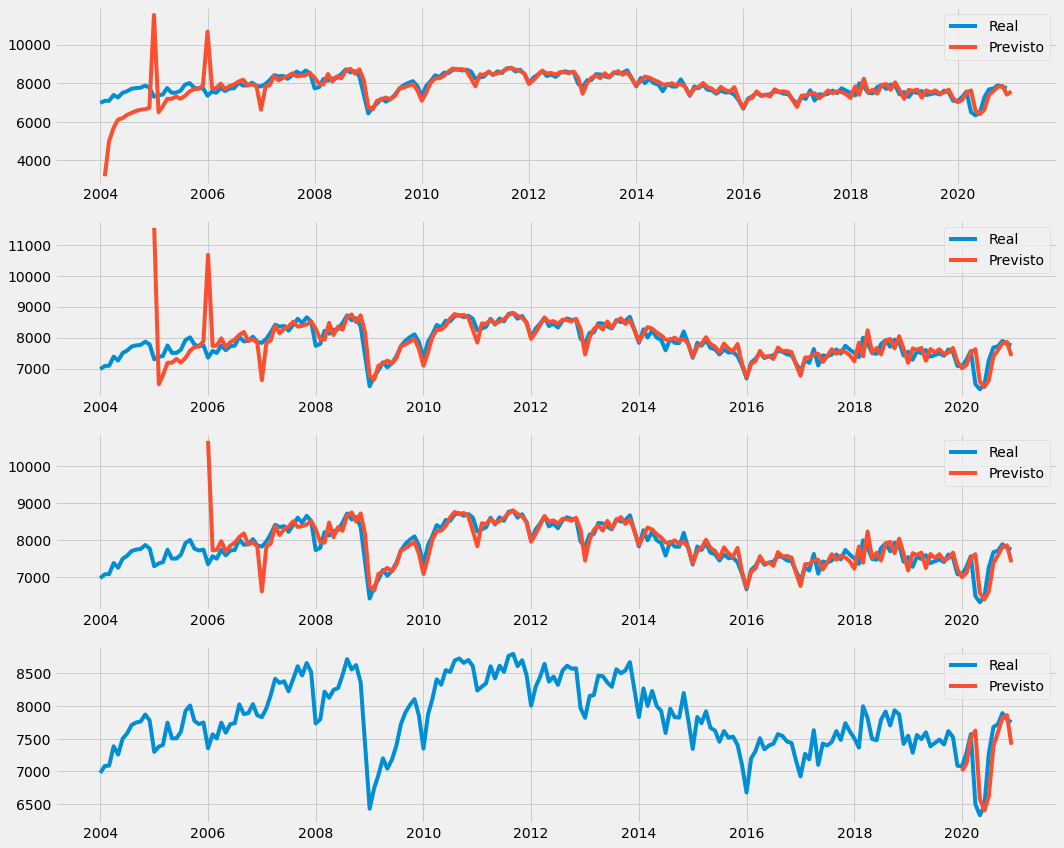

In [33]:
fig, axs = plt.subplots(4,1,figsize=(16,14))



axs[0].plot(df_sudeste['Consumo_Ind'],label='Real')
axs[0].legend()
axs[0].plot(forecast_treino_1,label='Previsto')
axs[0].legend()

axs[1].plot(df_sudeste['Consumo_Ind'],label='Real')
axs[1].legend()
axs[1].plot(forecast_treino_2,label='Previsto')
axs[1].legend()


axs[2].plot(df_sudeste['Consumo_Ind'],label='Real')
axs[2].legend()
axs[2].plot(forecast_treino_3,label='Previsto')
axs[2].legend()

axs[3].plot(df_sudeste['Consumo_Ind'],label='Real')
axs[3].legend()
axs[3].plot(forecast_treino_4,label='Previsto')
axs[3].legend()



<AxesSubplot:xlabel='data_tidy'>

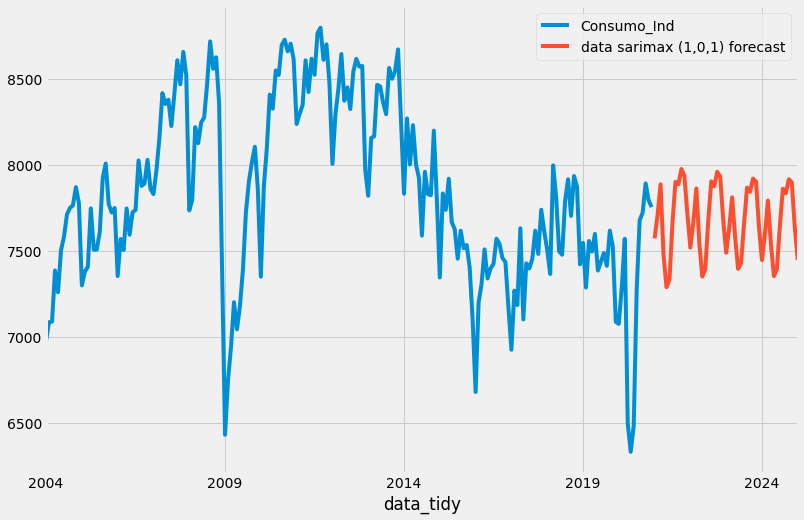

In [34]:
forecast_24 = results.predict(start = len(df_sudeste),
                           end=len(df_base)+24,
                           typ='levels').rename('data sarimax (1,0,1) forecast')
df_sudeste['Consumo_Ind'].plot(figsize=(12,8),legend=True)
forecast_24.plot(legend=True)

In [35]:
previsões = pd.DataFrame()
previsões['Real'] = df_sudeste['Consumo_Ind']
previsões['Predito_Sarimax'] = forecast_treino_1
previsões.dropna()

,Real,Predito_Sarimax
data_tidy,,
2004-02-01,7084.62266,3173.085358
2004-03-01,7087.61326,4992.385708
2004-04-01,7384.53963,5692.076822
2004-05-01,7258.30672,6109.539173
2004-06-01,7501.65514,6189.891423
...,...,...
2020-08-01,7677.07287,7385.598276
2020-09-01,7720.47116,7597.539648
2020-10-01,7890.75908,7814.184645


In [36]:
# data de 2004 a 20020
df_sudeste_2 = df_base[(df_base.index.year >= 2005) & (df_base.index.year <= 2020)]
df_sudeste_3 = df_base[(df_base.index.year >= 2006) & (df_base.index.year <= 2020)]
df_sudeste_4 = df_base[(df_base.index.year > 2019) & (df_base.index.year <= 2020)]
#df_2.index.year.value_counts().sort_index()

In [37]:
def metrica(df,pred):
    mse=mean_squared_error(df,pred)
    mae=mean_absolute_error(df,pred)
    rmse = np.sqrt(mse)
    a=print('MSE:  {}'.format(mse))
    b=print('MAE:  {}'.format(mae))
    c=print('RMSE: {}'.format(rmse))
    return 

In [38]:
# Testando o modelo á partir do 1 ano - 01/2004 até 12/2020
metrica(df_sudeste['Consumo_Ind'], forecast_treino_1)

MSE:  325390.1266202334
MAE:  288.8217476590499
RMSE: 570.429773609542


In [39]:
# Testando o modelo á partir do 2 ano - 01/2005 até 12/2020
metrica(df_sudeste_2['ind_se'], forecast_treino_2)

MSE:  214013.2503540817
MAE:  212.80493382209144
RMSE: 462.6156615961912


In [40]:
# Testando o modelo á partir do 3 ano - 01/2006 até 12/2020
metrica(df_sudeste_3['ind_se'], forecast_treino_3)

MSE:  115196.36642001553
MAE:  179.85400858929512
RMSE: 339.4059021584857


In [41]:
# Testando o modelo apenas em 2020
metrica(df_sudeste_4['ind_se'], forecast_treino_4)

MSE:  168966.46957420436
MAE:  274.4667524042722
RMSE: 411.05531206177636


## Método 2 XGBOOST

In [42]:
# Convertando a String Estaçao do Ano de volta a númerica
df_sudeste['Estação_Ano'] = (df_sudeste.index.month%12 + 3)//3

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2004-01-01 to 2020-12-01
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ano                  204 non-null    int64  
 1   Mês                  204 non-null    int64  
 2   Estação_Ano          204 non-null    int64  
 3   Consumo_Ind          204 non-null    float64
 4   Consumo_Res          204 non-null    float64
 5   Consumo_Com          204 non-null    float64
 6   Pesq_Mensal_Com_A    204 non-null    float64
 7   Pesq_Mensal_Com_R    204 non-null    float64
 8   População            204 non-null    float64
 9   Temp_Maxima          204 non-null    float64
 10  Temp_Minima          204 non-null    float64
 11  Produção_Industrial  204 non-null    float64
 12  Variação_Temp        204 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 22.3 KB
None


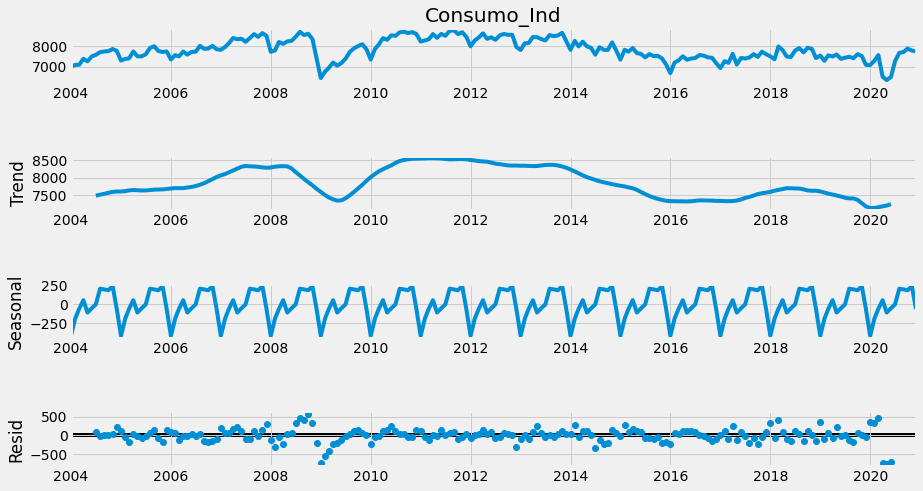

In [43]:
df = df_sudeste.copy()
#df.set_index('Date', inplace=True)
print(df.info())
df = df.astype(float)
res = sm.tsa.seasonal_decompose(df['Consumo_Ind'],period=12)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()


In [44]:
# Aplicando Dickey-Fuller para verificar a label é estacionária ou time-dependent

X = df_sudeste['Consumo_Ind'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.629533
p-value: 0.087046
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575


Dentro de um intervalo de confiança de 95% não deveríamos considerar esta label como estacionária, uma vez que o p-value encontrado é superior a 0,05 e ADF Statistic de -2.63 é maior que o valor crítico de 5% - -2.877.

Devríamos normalizar os dados, via log() por exemplo.  Optei para usar o XGBoost neste caso, transformando o problema em aprendizado supervisionado e vou trabalhar apenas com as features temporais, sem transformar os valores para uso neste método.

In [45]:
#SPlitando a base sudeste em treino e teste, sendo que o teste será realizado nos anos de 2018/2019 e 2020.
split_date = '2017-01-01'
df_train = df_sudeste.loc[df_sudeste.index <= split_date].copy()
df_test = df_sudeste.loc[df_sudeste.index > split_date].copy()

Aqui é importante comentar que para o método de XGBoost performar bem precisamos transformar este problema em um caso de aprendizado supervisionado modelando como série-temporal, que é o que vou fazer.

In [46]:
#Idéia é modelar este este apenas com features temporais

def create_features(df, label=None):
    
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [47]:
# Extraindo a features temporais nas bases de treino e teste
X_train, y_train = create_features(df_train, label='Consumo_Ind')
X_test, y_test = create_features(df_test, label='Consumo_Ind')

In [48]:
# Inicializando o modelo XGBoost com parâmetros default.
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

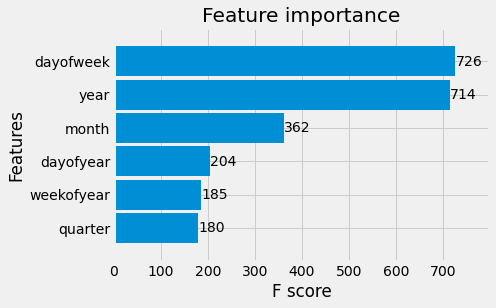

In [49]:
_ = plot_importance(reg, height=0.9)

In [50]:
df_test['Consumo_Prediction'] = reg.predict(X_test)
pred_all = pd.concat([df_test, df_train], sort=False)

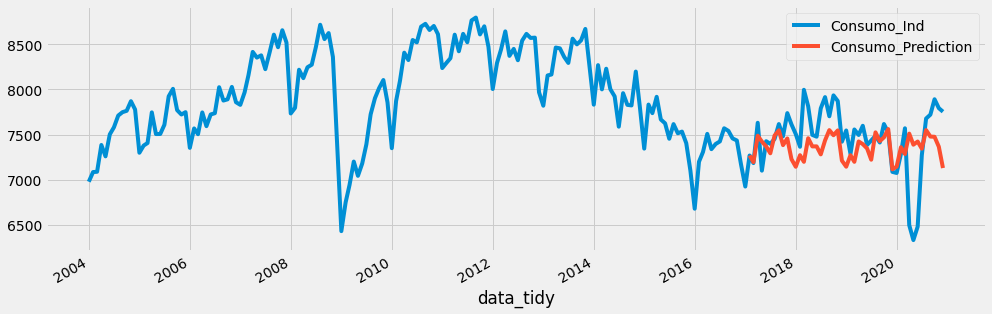

In [51]:
_ = pred_all[['Consumo_Ind','Consumo_Prediction']].plot(figsize=(15, 5))

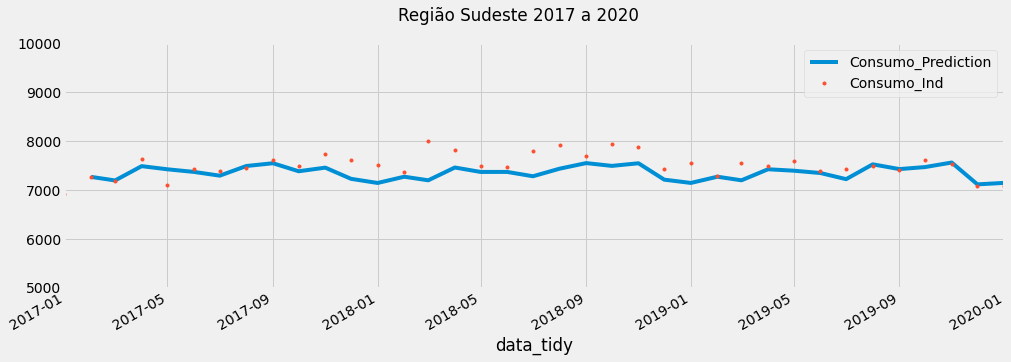

In [52]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = pred_all[['Consumo_Prediction','Consumo_Ind']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='2017-01-01', upper='2020-01-01')
ax.set_ylim(5000, 10000)
plot = plt.suptitle('Região Sudeste 2017 a 2020')

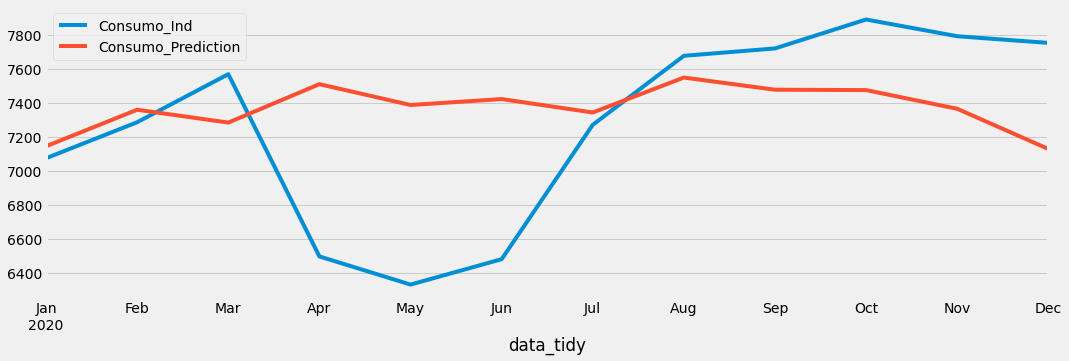

In [54]:
df_sudeste['Consumo_Ind']['2020'].plot(figsize = (16,5), legend=True)
df_test['Consumo_Prediction']['2020'].plot(legend = True);

Analisando-se XGBoost apenas para as previsões do ano de 2020, percebe-se claramente que o modelo não "preveu" a queda expressiva no consumo energético que inicou-se em março com o inicio da pandemia de Covid-19.  Ajustes precisariam ser feitos para tornar o  modelo mais responsivo.  Como citado em outras análises, não procurei explorar ao máximo todos os modelos por questão de tempo disponível e, tambem pode entender que fugiria do escopo deste teste.

In [59]:
db = create_features(df_base) # Prevendo consumo industrial sudeste para 24 meses além do último valor informado
db2 = create_features(df_sudeste) # Prevendo apenas para o datase reduzido da região sudeste

In [60]:
xgboost_24 = reg.predict(db) # Previsão dos 24 meses futuros solicitados pelo exercicio
b = reg.predict(db2) # previsão restrita aos anos de 2004 a 2020 para comparação de performance

In [61]:
df_nova = pd.DataFrame()
df_nova['Consumo_Industrial'] = df_sudeste['Consumo_Ind']

In [62]:
df_nova

,Consumo_Industrial
data_tidy,
2004-01-01,6977.47082
2004-02-01,7084.62266
2004-03-01,7087.61326
2004-04-01,7384.53963
2004-05-01,7258.30672
...,...
2020-08-01,7677.07287
2020-09-01,7720.47116
2020-10-01,7890.75908


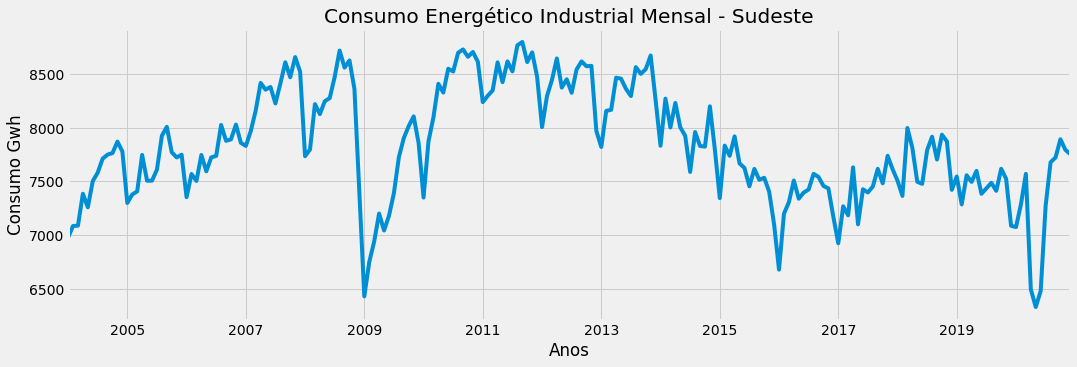

In [63]:
ax = df_nova['Consumo_Industrial'].plot(figsize = (16,5), title = "Consumo Energético Industrial Mensal - Sudeste")
ax.set(xlabel='Anos', ylabel='Consumo Gwh');

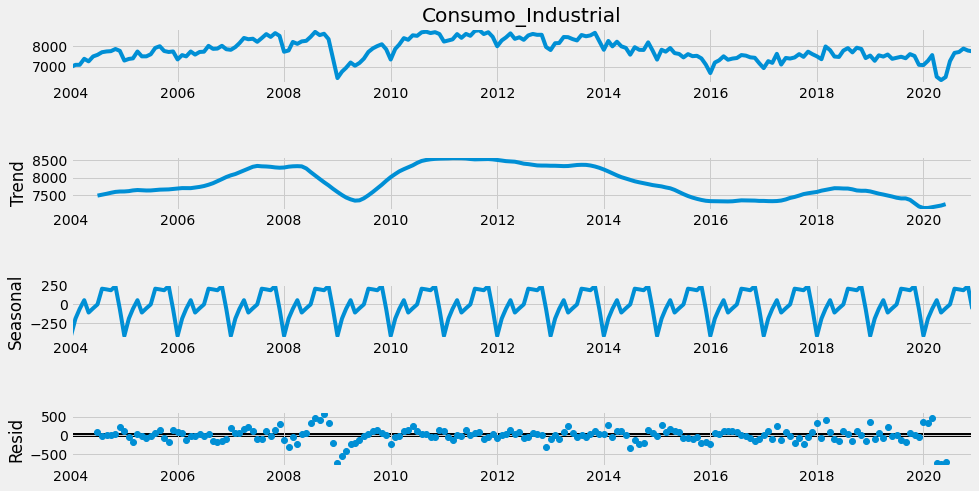

In [64]:
a = seasonal_decompose(df_nova["Consumo_Industrial"], model = "add")
fig = a.plot()
fig.set_figheight(8)
fig.set_figwidth(16)


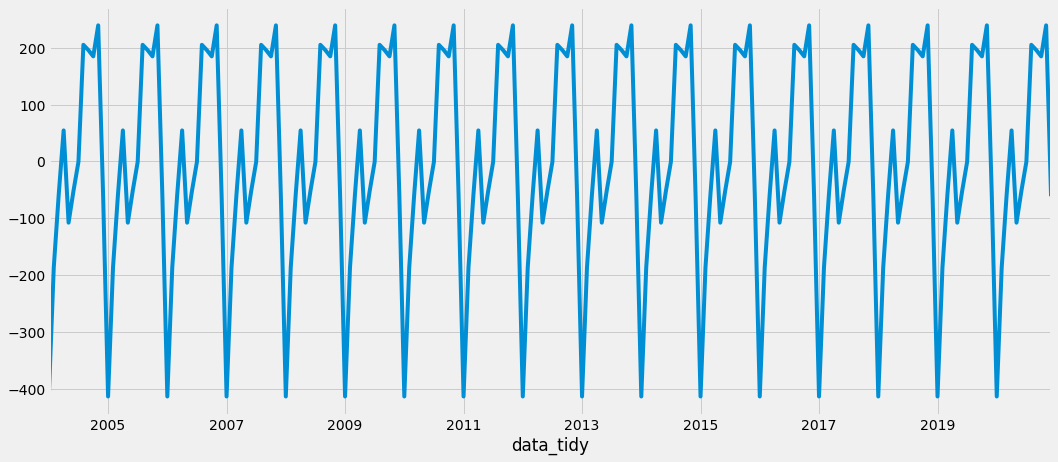

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [66]:
#Setando seasonal diferenciação, com periodos de 12 meses.
auto_arima(df_nova['Consumo_Industrial'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  204
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1381.502
Date:                              Tue, 22 Jun 2021   AIC                           2769.004
Time:                                      12:24:45   BIC                           2778.944
Sample:                                           0   HQIC                          2773.025
                                              - 204                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.8641      0.056     15.498      0.000       0.755       0.973
ma.S.L12      -0.5046      0.106     -4.770      0.000      -0.712      -0.297
sigma2      4.492e+04   2767.958     16.230      0.000    3.95e+04    5.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):               207.58
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.99
Prob(H) (two-sided):                  0.28   Kurtosis:                         7.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

É imortante comentar aqui que estou trabalhando com a maioria dos parâmetros com seus valores default, apenas por questão de simplicidade.  Para modelar um problema, visando colocar em produção, eu testaria todos os 8 métodos de auto_arima ( aqui estou usando <b>lbfgs</b>, testando várias condições, o que levaria a um grande tempo de treino do modelo.  Por questão de tempo e simplicado não farei isso.

In [67]:
# Base Treino - Todos os anos Exceto 2020
# Base Teste  - Ano de 2020

train_data = df_nova[:len(df_nova)-12]
test_data = df_nova[len(df_nova)-12:]
arima_model = SARIMAX(train_data['Consumo_Industrial'], order = (0,1,0), seasonal_order = (1,0,1,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                   Consumo_Industrial   No. Observations:                  192
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1282.137
Date:                              Tue, 22 Jun 2021   AIC                           2570.274
Time:                                      12:24:45   BIC                           2580.031
Sample:                                  01-01-2004   HQIC                          2574.226
                                       - 12-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9074      0.043     20.899      0.000       0.822       0.993
ma.S.L12      -0.5947      0.098     -6.041      0.000      -0.788      -0.402
sigma2      3.691e+04   2559.110     14.422      0.000    3.19e+04    4.19e+04
===================================================================================
Ljung-Box (L1) (Q):                   5.42   Jarque-Bera (JB):                73.97
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.75
Prob(H) (two-sided):                  0.50   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
# Prevendo valores de consumo energético para o ano de 2020
arima_pred = arima_result.predict(start = len(train_data), end = len(df_nova)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2020-01-01    7011.045164
2020-02-01    7014.607286
2020-03-01    7207.641259
2020-04-01    7238.110369
2020-05-01    7122.591208
2020-06-01    7089.909934
2020-07-01    7145.994721
2020-08-01    7224.400017
2020-09-01    7171.234443
2020-10-01    7257.677745
2020-11-01    7249.917687
2020-12-01    6963.524490
Freq: MS, Name: ARIMA Predictions, dtype: float64

In [70]:
arima3_pred = arima_result.predict(start = 1, end = len(df_sudeste)-1, typ="levels").rename("ARIMA Predictions")
arima3_pred

2004-02-01    6977.470820
2004-03-01    7084.622660
2004-04-01    7087.613260
2004-05-01    7384.539630
2004-06-01    7258.306720
                 ...     
2020-08-01    7224.400017
2020-09-01    7171.234443
2020-10-01    7257.677745
2020-11-01    7249.917687
2020-12-01    6963.524490
Freq: MS, Name: ARIMA Predictions, Length: 203, dtype: float64

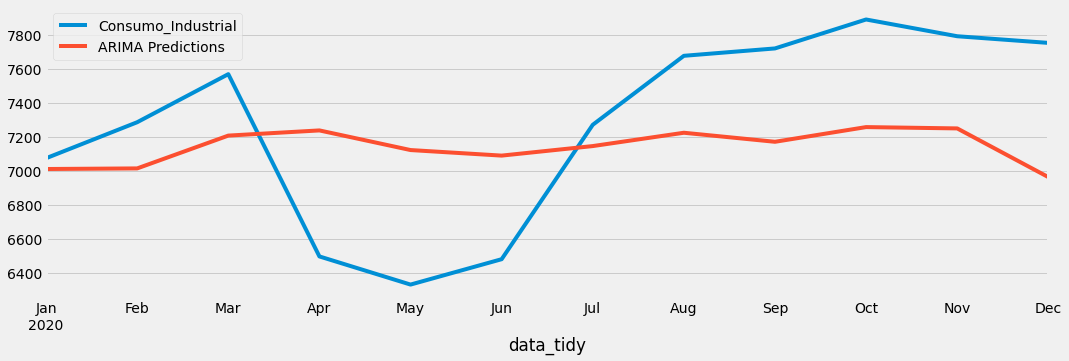

In [71]:
test_data['Consumo_Industrial'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

Analisando-se ARIMA apenas para as previsões do ano de 2020, percebe-se claramente que o modelo não "preveu" a queda expressiva no consumo energético que inicou-se em março com o inicio da pandemia de Covid-19.  Ajustes precisariam ser feitos para tornar o  modelo mais responsivo.  Como citado em outras análises, não procurei explorar ao máximo todos os modelos por questão de tempo disponível e, tambem pode entender que fugiria do escopo deste teste.

## Método LSTM

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [73]:
train_data

,Consumo_Industrial
data_tidy,
2004-01-01,6977.47082
2004-02-01,7084.62266
2004-03-01,7087.61326
2004-04-01,7384.53963
2004-05-01,7258.30672
...,...
2019-08-01,7485.98795
2019-09-01,7411.80667
2019-10-01,7616.44853


In [74]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [75]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20
180/180 [==============================] - 13s 3ms/step - loss: 0.0451
Epoch 2/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0228
Epoch 3/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0197
Epoch 4/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0227
Epoch 5/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0163
Epoch 6/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0151
Epoch 7/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0200
Epoch 8/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0178
Epoch 9/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0108
Epoch 10/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0192
Epoch 11/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0100
Epoch 12/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0120
Epoch 13/20
180/180 [===

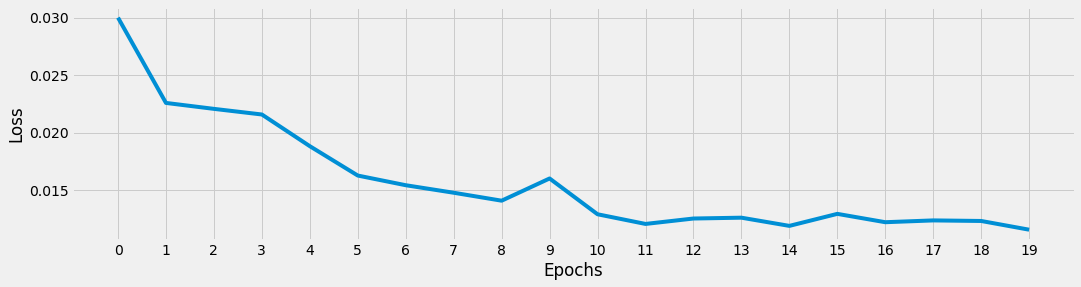

In [76]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(16,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [77]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [78]:
#lstm_predictions_scaled

In [79]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[7261.02645138],
       [7304.68052437],
       [7374.64252797],
       [7424.21374958],
       [7476.95867352],
       [7497.32443244],
       [7521.94637113],
       [7545.64309012],
       [7555.77997645],
       [7584.08658179],
       [7591.7385702 ],
       [7563.32912351]])

In [80]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data['SARIMA_Prediction'] = arima_pred
test_data


,Consumo_Industrial,LSTM_Predictions,SARIMA_Prediction
data_tidy,,,
2020-01-01,7074.52916,7261.026451,7011.045164
2020-02-01,7286.34843,7304.680524,7014.607286
2020-03-01,7569.11501,7374.642528,7207.641259
2020-04-01,6496.71031,7424.213750,7238.110369
2020-05-01,6331.11891,7476.958674,7122.591208
2020-06-01,6480.44847,7497.324432,7089.909934
2020-07-01,7271.17778,7521.946371,7145.994721
2020-08-01,7677.07287,7545.643090,7224.400017
2020-09-01,7720.47116,7555.779976,7171.234443


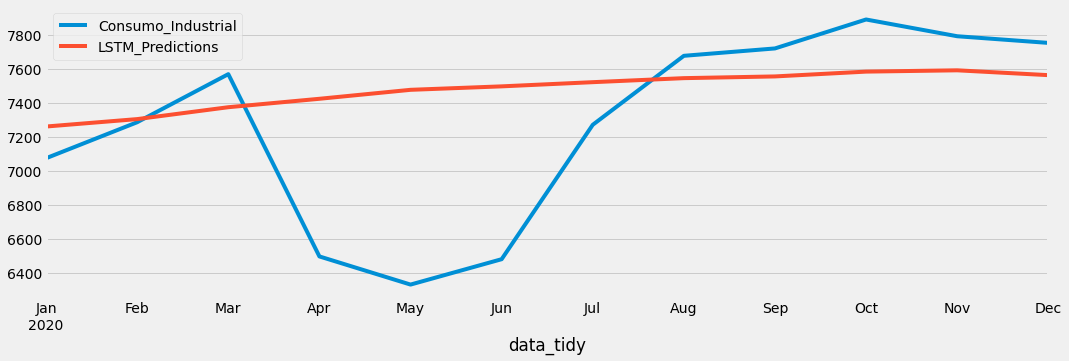

In [81]:
test_data['Consumo_Industrial'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

Analisando-se LSTM apenas para as previsões do ano de 2020, percebe-se claramente que o modelo não "preveu" a queda expressiva no consumo energético que inicou-se em março com o inicio da pandemia de Covid-19.  Ajustes precisariam ser feitos para tornar o  modelo mais responsivo.  Como citado em outras análises, não procurei explorar ao máximo todos os modelos por questão de tempo disponível e, tambem pode entender que fugiria do escopo deste teste.

In [82]:
scaler.fit(df_nova)

MinMaxScaler()

In [83]:
lstm_predictions_scaled_sudeste = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(df_sudeste)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled_sudeste.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [84]:
lstm_predictions_sudeste = scaler.inverse_transform(lstm_predictions_scaled_sudeste)
#lstm_predictions_sudeste

In [85]:
# Finalizando Predições com 3 Modelos
df_sudeste_aval = pd.DataFrame()
df_sudeste_aval['Real'] = df_sudeste['Consumo_Ind']
df_sudeste_aval['Prev_Sarima'] = forecast_treino_1
df_sudeste_aval['Prev_Auto_Arima'] = arima3_pred
df_sudeste_aval['Prev_XGBoost'] = b
df_sudeste_aval['Prev_LSTM'] = lstm_predictions_sudeste
df_sudeste_aval = df_sudeste_aval.dropna()

In [86]:
# Função para cálculo das métricas de comparação e validação dos métodos utilizados

def metrica(df,pred):
    mse=round(mean_squared_error(df,pred),2)
    mae=round(mean_absolute_error(df,pred),2)
    rmse = round(np.sqrt(mse),2)
    
    df, pred = np.array(df), np.array(pred)
    mape=np.mean(np.abs((df - pred) / df)) * 100
    
    
    return mse, mae, rmse, mape

In [87]:
metrica_Sarima = metrica(df_sudeste_aval['Real'],df_sudeste_aval['Prev_Sarima'])
metrica_AutoArima = metrica(df_sudeste_aval['Real'],df_sudeste_aval['Prev_Auto_Arima'])
metrica_XGBoost = metrica(df_sudeste_aval['Real'],df_sudeste_aval['Prev_XGBoost'])
metrica_LSTM = metrica(df_sudeste_aval['Real'],df_sudeste_aval['Prev_LSTM'])

In [88]:
# Criando Tabela para comparação das métricas apresentadas pelos 4 métodos;
# Escolha do melhor método para predição dos próximos 24 meses de consumo energético industrial região Sudeste
avaliacao_final = pd.DataFrame(columns=['MSE','MAE','RMSE','MAPE'])
avaliacao_final.loc[0] = metrica_Sarima
avaliacao_final.loc[1] = metrica_AutoArima
avaliacao_final.loc[2] = metrica_XGBoost
avaliacao_final.loc[3] = metrica_LSTM
avaliacao_final = avaliacao_final.rename(index={0:'Sarima',1:'Arima',2:'XGBoost',3:'LSTM'})

In [89]:
avaliacao_final

,MSE,MAE,RMSE,MAPE
Sarima,369817.82,286.21,608.13,3.785356
Arima,55012.16,167.26,234.55,2.187429
XGBoost,33057.44,81.12,181.82,1.084754
LSTM,288952.05,441.41,537.54,5.653394


Com base nos resultados de performance acima, escolho o método do XGBoost para predição dos próximos 24 meses de
consumo energético industrial para a região sudeste.

Medir a eficácia de métodos de predição em séries temporais não é uma tarefa simples. Apenas experimentção pode nos dizer qual(ais) melhor KPI pra o modelo em questão.  O que buscamos é  melhor balanço entre precisão e tendência(Bias), nuscando um modelo que seja o mais preciso e menos Biased possível.

Poderia investir um bom tempo detalhando cada métrica acima, já que cada uma têm seus prós e contras mas, para fins de praticidade, escolhi <b>XGBoost</b> pois apresenta os melhores valores de MAE e RMSE que são, na minha experiência, os melhores indicadores para o problema em questão.

In [90]:
df_sudeste_aval

,Real,Prev_Sarima,Prev_Auto_Arima,Prev_XGBoost,Prev_LSTM
data_tidy,,,,,
2004-02-01,7084.62266,3173.085358,6977.470820,7081.328613,7242.109255
2004-03-01,7087.61326,4992.385708,7084.622660,7073.012207,7315.007531
2004-04-01,7384.53963,5692.076822,7087.613260,7393.891113,7366.659234
2004-05-01,7258.30672,6109.539173,7384.539630,7302.354492,7421.617838
2004-06-01,7501.65514,6189.891423,7258.306720,7491.511719,7442.838338
...,...,...,...,...,...
2020-08-01,7677.07287,7385.598276,7224.400017,7549.136719,7898.663797
2020-09-01,7720.47116,7597.539648,7171.234443,7477.583008,7899.026767
2020-10-01,7890.75908,7814.184645,7257.677745,7475.326172,7899.384742


In [91]:
df_forecast = pd.DataFrame()
df_forecast = df_base
df_forecast = df_forecast[['ind_se']]
df_forecast['Previsões'] = xgboost_24
df_forecast.columns=['Consumo_Real','Previsão_XGBoost']
df_forecast['Consumo_Real'] = df_forecast['Consumo_Real'].replace(np.nan,'-')
df_forecast

,Consumo_Real,Previsão_XGBoost
data_tidy,,
2004-01-01,6977.47082,6964.974121
2004-02-01,7084.62266,7081.328613
2004-03-01,7087.61326,7073.012207
2004-04-01,7384.53963,7393.891113
2004-05-01,7258.30672,7302.354492
...,...,...
2022-08-01,-,7529.950684
2022-09-01,-,7531.501953
2022-10-01,-,7504.785645


In [92]:
# Salvando os dataframes principais em arquivo Excel para facilitar a leitura.
df_forecast.to_excel('forecast24_ahead.xlsx')
df_sudeste_aval.to_excel('sudeste2004_2020.xlsx')

In [93]:
!pip freeze > requirements.txt

## Conclusões e Comentários

Eu procurei, dentro do tempo que tinha livre para me dedicar ao desafio, explorar algumas técnicas de visualização, escolhi alguns modelos para trabalhar o desafio e tentei modelá-los de forma rápida e prática.  Obviamente que muito deve ser melhorado aqui para apresentar um modelo de produção mas acredito que este não seja o objetivo da prova.

Acabei por fazer a predição dos 24 meses futuros utilizando XGBoost, conforme já explicado.  É curioso o resultado obtido, utilizando uma modelagem de aprendizado supervisionado para predição em série temporal. Infelizmente não tive tempo suficiente para explorá-lo e validá-lo de forma eficiente, mas foi uma boa experiência.

Os modelos LSTM e Arima/Sarima são os mais indicado e esperava-se que apresentassem melhor resultado neste trabalho. Acredito ainda que eles possam superar o XGBoost mas vai demandar um pouco mais de experimentão e busca de ajuste de parâmetros.

Os resultados foram salvos em arquivo excel para posterior análise.